# Lab 05 - Car problem

Author: Gary Marigliano, based on the work of Hector Satizabal

- Professor: Carlos Peña (<a href="mailto:carlos.pena@heig-vd.ch">carlos.pena@heig-vd.ch</a>)
- Assistant 2018: Gary Marigliano (<a href="mailto:gary.marigliano@heig-vd.ch">gary.marigliano@heig-vd.ch</a>)
- Assistant 2019: Diogo Leite (<a href="mailto:diogo.leite@heig-vd.ch">diogo.leite@heig-vd.ch</a>)

Date: Winter 2019

## Instructions:

* Read this notebook
* Do/Answer where **TODO student** is specified
* The folder structure is like this:

```
fuzzy_systems
├── core
└── view
```

* `core` contains core classes like membership_functions, fuzzy_rules,...
* `view` contains classes used to display what the core classes do.
* Please keep this folder structure if you write additional classes.


**TODO student** Read and explore the code provided both in this folder.

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

In [2]:
from fuzzy_systems.core.linguistic_variables.linguistic_variable import LinguisticVariable
from fuzzy_systems.core.membership_functions.lin_piece_wise_mf import LinPWMF
from fuzzy_systems.core.membership_functions.trap_mf import TrapMF
from fuzzy_systems.core.membership_functions.singleton_mf import SingletonMF
from fuzzy_systems.core.rules.fuzzy_rule import FuzzyRule, Antecedent, Consequent
from fuzzy_systems.core.rules.default_fuzzy_rule import DefaultFuzzyRule
from fuzzy_systems.core.fis.fis import FIS, OR_max, AND_min, MIN, COA_func
from fuzzy_systems.core.fis.singleton_fis import SingletonFIS

from fuzzy_systems.view.lv_viewer import LinguisticVariableViewer
from fuzzy_systems.view.fis_viewer import FISViewer
from fuzzy_systems.view.fis_surface import show_surface

## Introduction

In this notebook we will look at the car problem that you have met in the lectures and transform it, step by step, into an interpretable fuzzy system. 

**Tip: when you do the exercises you can compare your results with the surface plots shown in the slides.**

The car acceleration problem is a problem where you need to decide which action between "push", "release" or "nothing" you must perform knowing the speed and the speed change (acceleration) of your car to maintain the same speed.

We can model this problem with this initial proposition.

<img src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAoMAAADlCAYAAAAoXP3gAAAABHNCSVQICAgIfAhkiAAAIABJREFUeJzs3Xd8VFXawPHfncnMpIdUEhIgodcAQgCp0qsFFHUpYgMBe9nFfe2ry667uiLr6goiCisiigWsgEiRIhACCYGQ0NN7L1PP+wcQHRN6SZnn+/nwB7llnjvnzJ1nzj1FU0ophBBCCCGES3Kr6wCEENeOpml1HYIQQoh6RpJBIVyMPAwQQghxhqZp6Oo6CCGEEEIIUXckGRRCCCGEcGGSDAohhBBCuDBJBoUQQgghXJgkg0IIIYQQLkySQSGEEEIIFybJoBBCCCGEC5NkUAghhBDChUkyKIQQosFSSpGefpKC/Nyr+jrFxYUcP5aCw2G/qq8jRF2QFUiEEKKBU0qRknKAuLgdZGakooCQ4FCiWrWnV69+VFZWkJF+kg4doxvFkoQ2m40NG74hPn438fGxZGelMmXqbKZNm33O68vOzmDb1g2cOHEYgLBmzWnZsg09evTBZHKntLQYo9GEyeQOQHJyIj9t+JZDyYkcSNxHeLMI5i/4Hz4+ftfkOoW4ViQZFEKIBqwgP5e33vor27ZtwNcvgJhe/QkIDCYt7QTffvcFGorQpuHkF+Yyf/4y/Pz86zrky6ZpGiajieLCAjIz0jjfCot5edl8sGQB69d/i6+vDz17DSAoKIQjRw7x2coP8Pbx4+ZbJrN27ZfcfPNkRo26BQCj0YTBYOTokUPYbJZrcGVC1A1JBoUQooGqqCjn1b//H3vifmHQ4BE8/viLeHv7VG+3WMysX7+GRQvfwGKpIikpgT59BtVhxFeGXq9n8A2j6d6jD488/AfS09PPum/yoUReeeUJcnIyGTN2Evff/xheXr++R5WVFaxYsZhFC1/HbLaQciiRkSNvQtN0REa24Z57H0Gn1/G/ZQuvxaUJUSekz6AQQjRQCfG7Sdgfi79/IDNnPumUCMKplq2xY29j3ry38fVtws9b1jeqPm8mkztNmgSedXt6+kn+8pcnyMzMZNToiTz44NNOiSCAh4cnd9/9ILPnzMVoNHD0WDJWq7V6u6ZpNG3aDL3+ql1GnThyOIlVq5ayZ892lHLUdTiijknLoBBCNEBKKY4cPYTVakOv12FwM5x1346duvHYY8/z/pI3KSkppkmTgGsY6dWjaRr6s1y3xWJm0buvk52dTlhYONOmzcbtLPtqmo7RoyeSfCiR2D07KC8vw2g0VW930zeer0qlFGvXfsWCN1/GYjETGBDC2+98QkBgcF2HJupQ46nhQgjhQjRNIzAwBJ1OUVCQw/KPFnL/zCdwd/eodf/efQYR1aodfn5NgFN9DZOSEsjITCUzIxU3g5G77ppNYuJeduzYxJHDB0HT6NL5OsbfeDthYRG1nre8vJQNP35DYuJeTp48SkjTMNq368KQoWMIDb0yxxQVFbB27Vfs37+HvNxswsIiiO4Ww8CBI876/qSkHGRP3HZAx8CBowg8T7Lj5ubGHXfeR8L+WHJyMvH3P3uLY2lpMWvXfsWuXT9TkJeLt68f0dE9GT/+doKCmtbYPy3tOOvXryEl5SB5eVn4ePnRunUHhg0fT9t2nZwGvRQU5JGUlEBmRiqZWak4HIp7730Ug8HA5k0/sG37T2RkpOHu7k6HDtFMnDiVpk2b1Rqn2VzFhg3fsHv3NgoL8ggMDCEsLII9sduY/+YyACoryvEP+PVaL6U8RcOnf/HFF1+s6yCEENfGSy+9hHzkG48A/0B+2bGJwqICDiXvZ+NP31JQmI/RaKRJkwD0v2nR0jQNLy+f6sQjOeUAa1Z/zDfffMaBA3spyM/l6LFkjh5Npt/1Q2jfoSsF+bl8//0qfvj+S5q3iKJ58yinxOXQof08PXcWBw7Ec9PNd3LTTXcSFBTCV6tX8MmKxYSGhdOyZZvLOiYxcS9z/3Q/O3/ZTPfuMYwbfzvh4S1JOhDP4sVvkJeXjdlsplv3GLp1i0HTNJRSfPP1p+zZ8wtGo4Fp02YR1qz5ed9PHx9f/Pz88fL0Jjg4tPrvR48cYtu2DXj7+OHh6cW/Xn8Bh8NBz5796Brdk4OJe/npp+/Y9csWBgwcjqenFwA2m5X/Lfsv//rX87Rp3ZHRoycwatQEAgJD+O67VaxcuYSqqkq6d++NTneq11ZKciLffPspX3+9ksT9cRQU5BEV1ZZ/vPp/ZGdn0KXLdcTE9OfkyaNs+PFbdu7cTP/+Q/Hy8na6lqysNP7vz7PYsW0Td02fw913P0SXLj344YcvOXHyKDEx/enS5TqahoZXv9eXUp6i4XvppZdACSFcBvKRb3QOJO5VM2fcooYP66yGDe2khg3tpIYP66zGjrlOPf74dLX8o4UqNfVYrcc6HHa1aOHratjQLmrkiGj18fJFym63VW+3Wq3q/fcXqJEjuqg7Jg1xOk9OTqa6e/o4NXFCf3X06CGn8548cVRNum2gmjihv0pKSrjkY3JystTd08epUSO7q9WrVyiHw+F0zP79cWrK5BFq2NAu6sMP/1O93WyuUnPnzlDDhnZSEycOUNnZGRf9vv7W2h++VCNHdFHDh3VVDz30B3XkiHPsx46lqJtv6qtGjeyutmxe97vjotVDD96pKisrnGNP2KPGj+utbrm5nzpx4ojTNofDoT755H01fFhXNWpkV3XfvTep3bu3Ol1/Xl62mjx5pBo+rKtatWqp0/Hl5WVq7twZatTIruqzTz90Ou7IkUPqlpv7qMl/GK4yMlKr/34p5SkaB0DJABIhhGjAOnbqxpsLlvPkUy/TK6Y/RqMJpRRmcxXx+3axePF87rv3RubMvp1Nm35wGiygaToimkeh10Oz8OaMGz8Jne7XkRJubm5MnDCFZuEtyS/I47tvP0cpB0o5+PrrT0lLO0nbdp2IiIh0iik0LJy27bpQUlLE12tW4nDYL/oYu93G999/TlraSSKaRzJkyNgaLVJt2nQgpJZHpDabjZKSIgDcTe4YDMbLfJdPCWsWwcsvv0WrVu2c/h4U1BRfP3+UslFSeup1lVKUlBYDENE8qkYMIU3D8PD0wGyuJC8v22mbpmm0aNEKnU7D1y+Al1/5Dz179nO6fm9vX5o1i0ApRV5ejlO5HjuaTEJ8LAaDB926xzgdFxwcio+PHzk52fz883qUUpdUnqJxkT6DQgjRwLm7ezB69ARGj55AaWkJCQmx7IvbSWzcDk4cP4Ldbic5OZG/zXuagvxcbpkwpTpB0J9+PKmj9kd/Pr5+REf3Ii31OHFxO6isrARg184tgIOE+FjumjaqxnElJSUopTh58ghWqxW73X5Rx5SWlrDzl80opYiO7omnp+cFvx+apqE/ndTaHXbU+SYivEAGvR59LcOKdToNo9GIw6GhHKo6hokTpzFo0EgCA4Odkuzfx2q310yuzjw2NrgZau0HqmkaxjMJ5u+ur7AwH7vdisHg5jQQBkCv12E0eaCUIjszHVBUVlZedHmaTI1seLWLk2RQCCEaER8fX/r1G0K/fkMAyMhIZc3qFaxevQKzuYpVq5Yx+IbRBAQEXdD5NE1Hi+atAB0FhXlUVVWilIOC/DyU0hg3bhLT7pqDTld7MqnXu2EyuZOfn3NRx1SUl5Gbk42maYSFRZw1maqNm5sbTfxOjZiuqqyksrLigo+9kjRNq+57WFCQx4EDezlx/DDHjx8hPf0ExUWFuLld+a/h4JBQjEZ3rFYbhYX5tGjRqnqb2WymvKwYvR5aRrVB03RUVpZfdHmKxkUeEwshRAOUlZXOkiX/xmyuOud+zZo1Z+YDT3LX9Dno9TpKSgrJzEy74NfRNA13dw90OgUOQCkcDoXjdGuUzW7Dy8sLLy+fWv+dadW62GPsDjsOZQO46Me8bm4GukRfh6bpsVjMHDuWfFHHX0mJ++N4eu4Mpk4ZyaeffoCHpxc33nQHjz32An5+V2dZu8jINlzX43osFitbtqx1eqwbH7+b4uJiWkV1YPDgUy2Al1KeonGRlkEhhGiADAYDG3/6hrDQcEaNnnDOEZ6apiM6Ogaj0YTdbsdqvfCl1ZRSFBbm43BoePv6YjS5o2ng69eEwsJcCvJyz7scHICnp+dFHePu7omHhw8FBYXk5WahlANNu7D2C03T6NN7ECs+fp+ysmI2b15L3743XFArXHFxIcBlL9unfjOfn5eXF889/y/69h1cXU65uVlwgddzsUwmdx59/HlKyor5es1nVFVW0KVLTzIyUvnm28/oFdOfBx54Cl/fU9MMXWzZiMZHWgaFEKIB8vPzJyqyPe8vWUDSwfjz7p+Xm43FYsXLy/escwbWxmq1sD9xD+CgQ/vOeHp64uHhyXU9+qCUxrHjh6oHa/yeUg5stlOreVzsMR4enrTv0BlNUyTu34vFcnFrAzdv0YoRI25EKY2dv2whKen871F5eSnzXvkTixfPr7Uf38UoLMxn6dJ3sFis3DbpHqdE8GorKirgnbf/TlBgMIve+5wRI28BTaNT5+4sWPARL730JuHhLav3v5TyFI2LJINCCNEAubkZ6NnreoqL8nn22QfZvn3jWQdKFBUV8PGKRYCDYcPGEhxcc2Jkm92Bo5YEKDFxLwcS9+Ll5cO48Xeg0+nR6fSMv/F2AgL8ycpK57vvVtVY0kwpxddrVvL+4jdxOOwXfYxOpzF69ASMRhNHjiZz5EhSjdiOHz9MWuoJgNOtnb9ev16vZ+q0WURHX0d5eSmvv/48J04cOev7mZ+fw7x5c6moKue+ex91GihyZnk6m91R63vscCisFutv4jg14XNVZTnw62CQX/e3s3v3VsrLSlFKOS1/d4bFYkbTFFarDeWouVycUgrL6deyWM1O5/7f0nfYunUDgwaPonnzKLp1i2H06An07TuY8PAWNVpYL6U8ReMik04L4UJk0unGxWAw8tOGbzCbzWzevJaMjJOEhIQREBB4evJlB/v27eL115/ncEoig28YwwMP/NFphOmZCZWLi4tJPBBHi+ZRBAQE43DY2b59I6+99hxVVZVMv/shBg0aUd265evbhKCgUHbv2srevTvRgFat2mM0mqiqquTLLz/il52bmTXrj3h4eF3SMcHBYRQXF3DgQBwJCXto2aIVwcGh5ORksG7tapYt+w8Ws5nKqnJQMHDQCKdrM5nc6dN3MOlpJ0hM3MfGjd+haRoR4S1xd/c4PS1LNl9++RH/ePUZgoKb8vTTfyMg4NfVSqxWC59/voxjR1OwWm307Hl9jRU/Dh8+yLffrMRqtWA0mejXbyienl4cStpPaupR0lKP065dZwICgjh8+CDLlr7D4ZREyspLKS0txc/Xj+t6Xk9eXg4eHp44HIo1q1dw8OB+7HYrXbr2rDHdS3Z2Bp99uoTKynI0NAYOGoXJZMJms/Hd959z/FgKP/+8gV27f+ZwygHSUo9TVFSA3W7Hw8OzxiPzSylP0Ti89NJLaOpKjbkXQtR7Z1ZnEI1DRUU5c+fOYOzYWwkPb8nyj94lLm4HRqOJgIAgCgryqKqy0KlzNFOnzqJXr341WoXWrf2K1157lmbNWjJ58gy++OKj6hY0m81G69btufMP9zNw4PBa++wl7o9j6Ydvs3ffTsCBt7cfer2OIUPHM3XqLHx8fC/rGKvVwurVK/j00w/Iz8tBp9Pw8PBkwIDh3DbpHhYseIX4fbtOjzoO59ln/0W79p2dXs9ut7Nt6wY+W/UhSQcTAAgKDqWqspySkhLatu3ATTfdybDh450Gq2za9AMfLPk3qaknAMfpwTTu9OjRhz/+aR46nY5XX/0/9sb9QkVF+emjdISHhzN16mx69urPwndf46efvsPhsKPXG2jRPJIpUx9gwMARbN/+E2+88RLFRUX4+PgS07s/gwaN4IMP/sOJ40dR6lQLnMnkTqfOPXj2mX/g4enFO/95lZ82fkd5+amWRU3TCAoKZvyNdzJ58gzi42P55z+eJTs7vcbnXdM0DAYjrdt0YOiQsYy/8Xana76U8hQNm6ZpkgwK4UokGWz8zOYqMjPTyMvNpol/AOHhLfHwOPscfWeSwYjwSOYv+B8+Pn6YzVXk5+fi7x94zmN/q7y8lPz8XIxGI0FBTXFzM1zRY+x2O7m5mdjtDkJCQi95Iuni4kLS009QWlKMj68fTZs2IyAg+Kr256uqqiQ/P4eAgOAa72dVVSW5OVk08Q+8YolWUVEBH3+0iMysk7Ro0Zqc3Cyys9LJzMyguDgPu/3UI2BN03PzTXcw56Gna0zdcynlKRomTdNkNLEQQjQmJpM7kZFtiIxsc1nnaHYBa/n+1pmpR67WMXq9ntDQCx/4cjZ+fv6XPVL4Yrm7ezgN2Pj9tuYtoq7Ya2VlpfHCC48wftztPDD7qRpJntlcRVJSAls2reW77z8nLm4H5eVl+Pg4T3NzKeUpGi5JBoUQwoWdaSd2IC3GDZ1Sis2b1lJZWcWgQSNrnajbZHKnW7cYOnToyonUoxQXFlzwlD2i8ZIaIIQQLkopRW5uFg6HRmV5BVVV557AWtRvmqbhHxBEaUkB8fGx5+wSkp2dQWZGGoMGj8LLSwaEuDrpMyiEC5E+g+KMrKw0dmzfxPLl71FQkIOm6ek/YAhjxtxKz57XSx+xBspqtbBy5RI+XfkBvfsMZMCA4UREROLj40tlZQW5uVnExm5n86a1DB06lqnTZtVYv1i4FhlAIoSLkWRQnJGcnEhCfCyO380n5+nhxfARN8r6sw1cQX4uO37ZxMED8RQU5lFWVoK3ty/BQSG0bduZQYNH1ugnKFyTJINCuBhJBoUQQvyWpmnSZ1AIIYQQwpVJMiiEEEII4cIkGRRCCCGEcGGSDAohhBBCuDBJBoUQQgghXJisQCKEi7maa7AKIYRoeCQZFMLFyNQyQgghzpCpZYQQQgghXJwkg0IIIYQQLkySQSGEEEIIFybJoBBCCCGEC5NkUAghhBDChUkyKIQQQgjhwiQZFEIIIYRwYZIMCiGEEEK4MEkGhRBXTUlJEaknj6GUo65DEUIIcRayAokQ4qyUUqSkHCAubgeZGakoICQ4lKhW7enVqx+VlRVkpJ+kQ8fo6mXuDh8+yIYN35KUlMCBxH1ENG/J/PnL8Pb2qduLEXUqOzuDbVs3cOLEYQDCmjWnZcs29OjRB5PJndLSYoxGEyaTex1Hennsdjt6vb6uw6ihPsZVWlpCQkIsdpvtrPtomoZOrycwMJjQps3waxJwDSN0HZIMCiFqVZCfy1tv/ZVt2zbg6xdATK/+BAQGk5Z2gm+/+wINRWjTcPILc5k/fxl+fv4AuOlP3VaOHjmIzWapy0s4p+zsDD7/fBkREZGMGTMRNzdDXYfUKOXlZfPBkgWsX/8tvr4+9Ow1gKCgEI4cOcRnKz/A28ePm2+ZzNq1X3LzzZMZNeqWug75kp08eZT//PtvvPDSfDw9veo6nGr1NS6bzUpy8n7WrfuanOx0lFJomoZ/QBAtIqLw8vbBbKkiLy+XtNTj2O12ukX35M7JM+jZ83qnddav9OfZ1e4PkgwKIWqoqCjn1b//H3vifmHQ4BE8/viLTi17FouZ9evXsGjhG1gsVSQlJdCnzyAAIqPaMmPG42hofPLJkrq6hHNSysGKFYv5es0neHh40qZNRzp2jK7rsBqd5EOJvPLKE+TkZDJm7CTuv/8xvLx+rUeVlRWsWLGYRQtfx2y2kHIokZEjb0LTGmYPpvKyUqz18AdQfY3L3z+Qu+9+mB49+vLnpx/AYrFyy4TJzJr1pxqtmFlZ6Xz44X9Yv+5rDhzcxxNPvsSwYePRNO2Kf55d8f7QMD9xQoirKiF+Nwn7Y/H3D2TmzCdrPOI1Gk2MHXsb8+a9ja9vE37esh6Hw169XdN0hIY2o549laqmaTo6d+6Ou7sX4c1aEhISek1f/8jhJFatWsqePdsbbX/K9PST/OUvT5CZmcmo0RN58MGnnRJBAA8PT+6++0Fmz5mL0Wjg6LFkrFZrHUV8eZRS7NmznaqqyroOxUl9jeu3goJC8PD0ws1No337LrU+zg4NDeehh/5Ml87dsVjMrFixmPLyMuDKf55d8f4gLYNCCCdKKY4cPYTVakOv12E4x+ORjp268dhjz/P+kjcpKSmmyW/68xgMxmsR7iUbPvxG+vcfhslkQqe7NlmrUoq1a79iwZsvY7GYCQwI4e13PiEgMPiavP61YrGYWfTu62RnpxMWFs60abPP+phN03SMHj2R5EOJxO7ZQXl5GUaj6RpHfHmUcrD15w18/sVHNA0Jq+twqtXXuH7Pzc2AXqeddz9PT2+69+hNwv448nKzKSkpqv6heqU/z652f5BkUAjhRNM0AgND0OkUBQU5LP9oIffPfAJ3d49a9+/dZxBRrdrh59fkol+rtLSYH9d/TVJSAidPHkXv5kZUVFuGDBlL9+4xaJqOvXt3smbNSpTj107mbgYjd9x+L6VlJTW3uRm4ZcIUIiPbsujd1ykuKajeptcbuGHIGDRNIyPjJJkZqbgZjNxzz8O4u3tQUJBHUlICmRmpZGal4nAo7r33UQwGA5s3/cC27T+RkZGGu7s7HTpEM3HiVJo2bVbrtZnNVWzY8A27d2+jsCCPwMAQwsIi2BO7jflvLgOgsqIc/4DAi37f6ruUlIPsidsO6Bg4cBSB5/kyc3Nz44477yNhfyw5OZn4+zu/JxdST4ArVn4Oh51dO3/mxw3fkJZ6HC8vL9q27cz4G+/g2LFk2rXrTHDwqdaiLZvX8d5788nISEUpO3abjX/8/f/Q6bXqetq6TYfqc6elHWf9+jWkpBwkLy8LHy8/WrfuwLDh42nbrpNTP7jLuZ6LjathUNUtnAY3NwwGY/V7VNvn+bcutEzPdb7GfH+QZFAIUUNMr/5EhEdy4uRRvlr9MTt3bWbwDWPo02cQ7dp1dmq50TSNkEtodUjcH8ff/jaXkpIi7rjjXm6bNJ2iwgK++PIj/vz0DIYMGcfDjzxD27Ydad++Mx9+8BZmcxV+fv78ae48WrRshcViplPHaD744D9UVpbh49OERx97ltatO2A0mhh34yQ+/ngxmzb+gLe3N/fe+whGo4k1q5eze/d2LBYzLVu0YurUB3B39yAt9Rjr1n3Fzl+2YDZXERwcSkzMAJYtfRt//0C6dYthwIDhrFu3ms9X/Y+dv2zmH/98rzoxOCMrK42/vPQEBfl5PPnHv9Cz5/UUFubz5psvk5N3qkWjZ89+l11O9ZFSip2/bKaiohKj0UCvXv0uqA9gs2bNueuuOTjsdqe/X2g98fT0viLlZ7Va+PeCv7J58/fcccf9TJnyADarld2xW/nz0zMoKy/noYf+zJAhYwHo2asf7dp35ofvv2DZsncJCg7lnvsewd3dA51OVz2wymazsvyjhXzxxTLGjbudO++8D3//QJKTD7Bs6dt8+dVybrttOvfe92j1Y9LLuZ4LjashKSzIZ9eun9E0RbsOXWnSxJ+DB+P5/rvPav08n3ExZZqWdvys52vU9wclhHAZF/ORP5C4V82ccYsaPqyzGja0kxo2tJMaPqyzGjvmOvX449PV8o8WqtTUY2c9/rtvV6mRI7qo++67WZWWljhty83NUndPH6fGjO6hfvjhS+VwOKq3lZeXqeeenaOGD+uq3nprnrLZbMpms6nXX39eDRvaRU267QaVk5NVvb/dblNvvTVPDRvaRU2ZPEIVFOQ5vdb+hD3q5pt6q9WrV1S/jsNhV4sWvq6GDe2i7r17vCopKare3+FwqE8+eV8NH9ZVjRrZVd13701q9+6tTjHm5WWryZNHquHDuqpVq5Y6vV55eZmaO3eGGjWyq/rs0w+djjty5JC65eY+avIfhquMjNQLKIWGx2yuUnPnzlDDhnZSEycOUNnZGZd8routJ0pdfvmtW7dajRndQ73+2vPKbrc5bTt58qi69+7x6r/v/EM5HPbqvzscDvX5qmVq+LCuavasSaq8vKzGtaz94Us1ckS0eujBO1VlZYXTtv0Je9T4cb3VLTf3UydOHHHadjnXcyFx1QdZWelq0m0D1aiRXdW6datr3SczM1U99+yc05/zkerY0eTqbef6PCt18WXqavcHQMkAEiFErTp26sabC5bz5FMv0yumP0ajCaUUZnMV8ft2sXjxfO6790bmzL6dTZt+uOCOzkop1q9bQ1raSVq3bs/AgSOcHo15enox6fZ7MRoNbNjwLWlpx9Hr9YwaNQFPTw9KSopITNxTvb9Op2fokLF4enpQWJhP8qH9Tq+XmZVG09BwbrhhdPXraJqOiOZRtQ5w0TSNFi1aodNp+PoF8PIr/6Fnz35OMXp7+9KsWQRKKfLycpyu/djRZBLiYzEYPOjWPcbpuODgUHx8/MjJyebnn9dz6j7cuNhsNkpKigBwN7lfct/RS6kncHnlp5SDxIQ4rFYLObmZWCzOI3CbN49i9oN/5mTqsYsa6KKUoqS0GICI5lE13pOQpmF4eHpgNleSl5fttO1y62NDYrMpVqxYzB//eH/1vyeeuJt77hnPfffezNGjh5k4cQoLFvyPyKi21ced6/N8KWXqivcHeUwshDgrd3cPRo+ewOjRE6oniN0Xt5PYuB2cOH4Eu91OcnIif5v3NAX5udwyYYrTza02ZnMV23dsRClFly7X4e5ec5LhFi1a0cQ/iJzsTGJjt9GyZWuiotrSMrINSQfj2bjhewYMGF49KOFk6jEslirsdgcbN/1Ar5gB6PV6bDYr27dvZNDAkXh7+zq9hl539t/CutPbDG6GWvtKapqG8cwX+u9u2IWF+djtVgwGtxoDIfR6HUaTB0opsjPTAQWcv+N8Q6JpGvrTHe7tDvslf6Fdaj2Byyk/jYjmkeh0Grt3bWfmzFu5vs9gunWPoXPn7vg1CaBnz760bt3+opJcTdOYOHEagwaNJDAw+KwDEjRNw/67x+SXdz0Ni15/qotK9+69ASgvL2PhotfJz8shLCycf7625Kx98M7+eb60MnW1+4Mkg0KIC+Lj40u/fkPo128IABkZqaxZvYKfRYjTAAAgAElEQVTVq1dgNlexatUyBt8wmoCAoHOep7KyguzMDDRNIzQsotb+ZEajiQD/IHKy0zlyOAmHw46HhydDhowh6eB+DiTtIy8vh9DQcMzmKjZvXkvPXgPYvWsLCfG7KS4qICAwmPz8XFJPHOXu6Q+dN0m9UoJDQjEa3bFabRQW5tOiRavqbWazmfKyYvR6aBnVpsHOp3cubm5uNPE7Naq8qrKSysqKSzrPpdaTyxn5qWkaY8beyrFjh1i/fg0Z6SdY9flSVn2+FL1eR2RkG/oPGMH4cZMuuj5pmlbdd6ygII8DB/Zy4vhhjh8/Qnr6CYqLCnFzc+2vZE3TaN2mA336Dv71bzqN1/75HBkZGSxc+C/mzv3rRY02v5pleinq6/2h8d2JhBCXJSsrnSVL/o3ZXHXO/Zo1a87MB57krulz0Ot1lJQUkpmZdt7z22xWHOrU6N+zLY+l0+kwGE+1+lWZq1Dq1E29b98baOLnR0lxAbG7twGn5rOrrKxg+l0P4u3tR15eLgkJsQAkJMQS0bwlYc0iLvj6L1dkZBuu63E9FouVLVvWOs2/GB+/m+LiYlpFdWDw4FHXLKZryc3NQJfo69A0PRaLmWPHki/pPJdaTy6Xp6cXTz71Cv9+awV33nkfraLaodfrsNsdHDmSzLKlb/Pww5M5fizlos+duD+Op+fOYOqUkXz66Qd4eHpx40138NhjL+Dn53f5wTdCAweOYOjQcQBs/flH1q796qJbm69mmV6s+np/cO2fIUKIGgwGAxt/+oaw0HBGjZ5wzl/LmqYjOjoGo9GE3W7Haj3/Kgfu7p54eHhSUFBIcXFh9RJUv2W326mqrEApjaCgEHSn5yALCQklunsfNm/6no2bfmD4iBvZuvVH+vYdTGRUGzp37sb27ZvYuOl7YnoPZPv2TQwdNv6aLiVlMrnz6OPPU1JWzNdrPqOqsoIuXXqSkZHKN99+Rq+Y/jzwwFP4+l78VDwNgaZp9Ok9iBUfv09ZWTGbN6+lb98bLqjVq7i4EAA/P//LqieXymazsm/fLqKje9G2bSfatu3E/TOeoLi4kIT4WDZs+Jpt2zaRk5PJJyuX8Mc/vnxBLZHqN/PHeXl58dzz/6Jv38HV15ObmwWNsJX4SnBzM3DPPQ9zMCme48dSWLr0bTp16k6rVu0u6PirVaaXqr7eH6T2CSGc+Pn5ExXZnveXLCDpYPx598/LzcZiseLl5UtY2Plb4Dw8PGnfIRpNU6SkHKi1j1RJSRF5eVkYjQa6Rf86j5ybm4ERI27EYDByOOUgycmJxMfHMnDgCIxGEwMHjUKv13EwMZ7k5EQKC/Po1i3m4t+Ey1BUVMA7b/+doMBgFr33OSNG3gKaRqfO3Vmw4CNeeulNwsNbXtOYrrXmLVoxYsSNKKWx85ctJCWdvx6Vl5cy75U/sXjxfOx2+2XVk0tltVpZseJ9Dv6u3vv5+TNg4HCee/4NHnn0GfR6HYWFeTgcNVuobFYrDofzAI7CwnyWLn0Hi8XKbZPucUoEr5Xa4qovftvSV1urX0BgMHPmzMXDw5vCgjzeemseFRVlF3TuK1GmV1J9vT9IMiiEcOLmZqBnr+spLsrn2WcfZPv2jWd9LFNUVMDHKxYBDoYNG0twcFPg1A39TCuh3W5zehTi5ubG+PG34+HhyYHEODIzUp3OqZRi184tlJQU0bp1e7r36O20vVOnbjQNbUZZWSlLl75NWFh49TyH0dG98PUNpKg4j6VL36Z7t5gaS+mdcWbkoM3uqHF9FosZTVNYrTZULV+gSiksp6/PYjVX/93hsPO/pe+wdesGBg0eRfPmUXTrFsPo0RPo23cw4eEtGmU/wd/T6/VMnTaL6OjrKC8v5fXXn+fEiSNn3T8/P4d58+ZSUVXOffeemmfvcurJpZafyWQitGkzFi36F4WF+TWO0zQNPz9/9HoDHTtEVz++1jQNg9GITqcoryjDYjE7HWc2V1FVWQ78OvjgDIfDzu7dWykvKz39uak5SvlSr+d8cdUXFosZq9WO3X5qXfTadO/emwkTJgM6EvfHsuLjxU73lbN9ni+1TF3t/tD470pCiIvWuct1eHp6UVVVySsvP8lr/3yWlJQDTlNw7N27k+eee4gjhw8y+IYxTLtrTvXjFavVwt59u3A4FIUFuaSmHnc6f5cuPZg6bTZlZWX87W9zSU09Vn3eLVvWsXjxmwQGNuWRR5/D09Pb6VgfH18GDhiBUoqkg/sYNmx89Q08MDCYrtE9sdsdHDuawsBBI2q9uZ6KbycOh6KgII/jxw9Xb7Pb7cTt2YHNpigrKyY55UCN4/PyckhLPYqmKQ4l7aesrKz62Jy8LMzmKl55+Y88+uhU/r3gFVZ9tpRt237i+PHD5+2L2Vj4+jbh+RfeoF+/oaSlnuSJx6ezcuUSiotOrQijlCI3N4uPPnqXmTMmAvDCC2/g95slDS+lnlxO+WmajjZtO5KSfJD/e3oWO3duqS4vpRSJiXt5b9EbtGvbmQkTpzq17rVq1Q6TyYP8/Dx++WUTSikK8nN5+eWnKCstpkuX6wAHX37xEfv378FqtXDo0H7mv/EXtm/bgI+vHxaLlT27t2GzWcnJycThsF/W9ZwvrmvRR+58lFIkxMdSWVkKONi98+daPyM6nZ5Jt99Dp87ROByKlSs/4MMP/kNFRfk5P8+XUqaueH/QVGOc6EoIUStN0y6o83VFRTlz585g7NhbCQ9vyfKP3iUubsep0ZsBQRQU5FFVZaFT52imTp3ltMrEpk0/8P7iBaSnnwQcaJqGu7s7vfvcwJNPvlj9pa2Ug507f+bTT5aQnHKQJk38qKo69Wu6T5+BTJn6AKGh4bXGd+RwEk8+OZ2WLdvw6j/ec5reYfPmtcz761x69uzLiy+9WWMKkE2bfuCDJf8mNfWEU3w9r+vPsBHj+fDD/3Di+FGUOtXqYDK506lzD5595h94eHrxzn9e5aeN31FeXlrdjy0oKJjxN97J5MkziI+P5Z//eJbs7PQa77WmaRgMRlq36cDQIWMZf+Pt9X4N58tlt9vZtnUDn636kKSDCQAEBYdSVVlOSUkJbdt24Kab7mTY8PG1vhcXU0927fqZd9997bLKL+lgAqvXfMLIETex7H//JSV5P01DI6isrMRSVcHosbdy223Ta6zgYbfb+ebrlfzvfwspLi4gIrwFbkYTt946jeHDx1NcXMS7//0nP/30HQ6HHb3eQIvmkUyZ+gADBo5g+/afeOONlyguKsLHx5eY3v0ZNGgEH3xwefXR4VDnjOtarbtbmxMnjjBv3h85fiwFu/3UD01N0/D3D6Dv9UN4+OFnatSJ5ORE/vznWRQXFaBpGh4eXvj4+JKdncXvP89P/ekVvL19OHhg3wWXqSveHzRNk2RQCFdyoclgbczmKjIz08jLzaaJfwDh4S3x8PC8InE5HHZycrLwcPdwahlqiIqKCvj4o0VkZp2kRYvW5ORmkZ2VTmZmBsXFeb/50tNz8013MOehp+v0C/laKi4uJD39BKUlxfj4+tG0aTMCAoIvuP9cXdQTi8VMbm4WHh5e+PsHnjdWm81GXl4W7u6eNKklxqqqSvLzcwgICK7x+amqqiQ3J4sm/oH4+PjWOPZynC8uV3KxZXol1cf7gySDQriYy0kGxfllZaXxwguPMH7c7YwbP6nGTdxsriIpKYEtm9by3fefE9q0GfMX/A8fH5lWRIjGrr7eHzRNk6llhBDiSlBKsXnTWiorqxg0aGStv+ZNJne6dYuhQ4eunEg9SnFhgUsMKBHC1dX3+4PchYQQ4grQNA3/gCBKSwqIj489ZwtsdnYGmRlpDBo8Ci8vr2sYpRCiLtT3+4M8JhbChchj4qvLarWwcuUSPl35Ab37DGTAgOFERETi4+NLZWUFublZxMZuZ/OmtQwdOpap02Zd1NJaQoiGq77eH6TPoBAuRpLBa6MgP5cdv2zi4IF4CgrzKCsrwdvbl+CgENq27cygwSOln6AQLqq+3R8kGRTCxUgyKIQQ4rc0TZM+g0IIIYQQrkySQSGEEEIIFybJoBBCCCGEC5NkUAghhBDChbkB13QpFiFE3ZLPuxBCiN+qXoFERhiKq0VGsNYfmqbxYl0HIYRo9F58sa4jEBdKvaDkMbEQQgghhCuTZFAIIYQQwoVJMiiEEEII4cIkGRRCCCGEcGGSDAohhBBCuDBJBoUQQgghXJgkg0IIIYQQLkySQSGEEEIIFybJoBBCCCGEC5NkUDQ6JSVFpJ48hlKOug5FCCGEqPfczr+LENeWUoqUlAPExe0gMyMVBYQEhxLVqj29evWjsrKCjPSTdOgYXb3O7uHDB9mw4VuSkhI4kLiPiOYtmT9/Gd7ePnV7MaJe0ZpA6yFgONvPYAdUZUHRMSjOBoesoiiQeuMKTN4wqjkYfvtHB+w8Aqk25339m8ENfjVb03JOwJaKqxzoVSLJoKhXCvJzeeutv7Jt2wZ8/QKI6dWfgMBg0tJO8O13X6ChCG0aTn5hLvPnL8PPzx8AN/2pqnz0yEFsNktdXoKoxzQjBPSGzvdCi5DTf7RB4R7IzwaHB/hFQkAUqMOw+1XY9hGUS5VyaVJvGj+dATq2hCndoavp9B8VxP4IA7ZC1W/2NXhA55YwqTtEm8BWBZ/FwedpdRH5laEppZSmaSglP2XE1XGh9auiopyXXniMPXG/MGjwCB5//EWnlj2Lxcz69WtYtPANLJYqnn/hDfr0GVS9XSkH7y2azyefLCEyqrW0DNZC0zRerOsg6gH3G+DB9eCth+xHYdECsP9mu2c/GLMUurSC0s/gvalQIl/sLk/qzYV78cW6juDSRPSAA+OhyAIR7qCqYPZ/YWFxzX3Du8GBm2HPpzDsIDTUjknqBSV9BkX9kRC/m4T9sfj7BzJz5pM1Ejmj0cTYsbcxb97b+Po24ect63E4fr0Va5qO0NBm6PXXOnLR0FhTocIMOKA41vkLHaBiG6y5E/LN4DMRxo0ErS4CFfWK1JvGrygbSmyw/FtIsYHOHV4eA6G1FGRRDhTZYG9+w00Ez5BkUNQLSimOHD2E1WpDr9dhcDOcdd+Onbrx2GPPk5yyn5IS559rBoPxaocqGgFlAfvpu/fZGq0tCZBwDNBD+AyQmiWk3jR+DjtYFJRmwqx4sAAhbeHvUTUTJocdrA4oaeiZINJnUNQTmqYRGBiCTqcoKMhh+UcLuX/mE7i7e9S6f+8+g4hq1Q4/vyYX9TqlpcX8uP5rkpISOHnyKHo3N6Ki2jJkyFi6d49B00593Pfu3cmaNStRjl97DrsZjNxx+72UlpXU3OZm4JYJU4iMbMuid1+nuKSgepteb+Cmm++ka9eeFxWrqGN2KDndGVzvK7+cxQWSetM4KNi8Ab5sB7d7w53j4L8LYYe5rgO7OqSeinojpld/IsIjsdsdfLX6Y2bOuIXFi+ezf/8eLBbnT6CmaYSEhFUnbxcicX8cs2dN4v3336R580ieePIlpt/1IPn5ufz56Rn849VnqKgoA6Bt2460b9+ZX37ZwubN69i3bzfDho2nRctWtG3bkU4do9m1azubN68jLm4X/foPpXXrDnh4eDLuxkloOjc2b/6RPXt+oWvX62jTpuMVfa/ENeABzU8PFijfCta6jUY0FFJvGg17OTyxDvIUmALg3b7gWddBXSWSDIp6IyAwmKf++AqtW7cDICMjjY+XL+Lxx+5iwi39eOKJu/l4+SLS0o5f9Lnz8rJ57bXnKCjI46GHn2HylAdo06YjvWL688wz/6R374GsX/8NS5b8G7vdjpeXD7feehfDho8HdOj1Blq1ao/BYMTLy4cJE6cweswtgA4vLy+6deuNyeSOpmm0adORiROm4O3tyX33P8aNN92Jh0djvYU0Xv7ToVM4qBLYtRhs5z9ECKk3jUx6IryYeqpPYJfr4X7/uo7o6pBkUNQrHTt1480Fy3nyqZfpFdMfo9GEUgqzuYr4fbtYvHg+9917I3Nm386mTT9c0MTSSinWr1tDWtpJWrduz8CBI6rnJwTw9PRi0u33YjQa2LDh2+pkU6/XM2rUBDw9PSgpKSIxcU/1MTqdnqFDxuLp6UFhYT7Jh/Y7vWZmVhpNQ8O54YbRTq8l6jfNHfw6Q9d/wn3/ApMFDjwOu4/VdWSiPpN604jZ4f2vYZ8FdCZ4bhyEN8LMSfoMinrH3d2D0aMnMHr0BEpLS0hIiGVf3E5i43Zw4vgR7HY7ycmJ/G3e0xTk53LLhCnnTLjM5iq279iIUoouXa7D3d29xj4tWrSiiX8QOdmZxMZuo2XL1gBERbWlZWQbkg7Gs3HD9wwYMBy304NbTqYew2Kpwm53sHHTD/SKGYBer8dms7J9+0YGDRyJt7fv1XmTxJWhg/Zb4YUz/1dgL4XSNEh9G/YuhuQEkIm3hBOpNy6lMhdm7IIt/SEoCl5vA1OS6zqqK0uSQVGv+fj40q/fEPr1GwJARkYqa1avYPXqFZjNVaxatYzBN4wmICDorOeorKwgOzMDTdMIDYuotZ+h0WgiwD+InOx0jhxOwuGwo9Pp8fDwZMiQMSQd3M+BpH3k5eUQGhqO2VzF5s1r6dlrALt3bSEhfjfFRQUEBAaTn59L6omj3D39IWkVrO8ckDwUVu44/X8FdhedF05cBKk3LifuZ1jaGWY2gQljoP9J2FXXQV1BjbCxUzREWVnpLFnyb8zmqnPu16xZc2Y+8CR3TZ+DXq+jpKSQzMxzT/tus1lxqFM9d/RnmYRQp9NhMJ5q8asyV1VPG6FpGn373kATPz9KiguI3b0NgPT0k1RWVjD9rgfx9vYjLy+XhIRYABISYolo3pKwZhEXfP2i7igr2M2n/8kXurhAUm9ci6MKnvsOMh1gbAL/7Q/ejei3viSDol4wGAxs/Okbftrw7XlXK9E0HdHRMRiNJux2O1brue/E7u6eeHh4opSiuLiw1vPb7XaqKitQSiMoKASd7tdPeUhIKNHd+1Q/Djabq9i69Uf69h1MZFQbOnfuht1uZeOm76moKGf79k0MHTa++nGyEEKIhi/3MDx15NRk4+17w5zAuo7oypFkUNQLfn7+REW25/0lC0g6GH/e/fNys7FYrHh5+RIWdu4WOA8PT9p3iEbTFCkpB7Dbf79uAJSUFJGXl4XRaKBbdIzTo2Q3NwMjRtyIwWDkcMpBkpMTiY+PZeDAERiNJgYOGoVer+NgYjzJyYkUFubRrVvMxb8J4tr5zS96eZIvLpjUm8ZPO1XMtSZHDlj1LWytAp0R/jQamjaSLKqRXIZo6NzcDPTsdT3FRfk8++yDbN++8awthEVFBXy8YhHgYNiwsQQHNwVOjRo+00pot9uql6pzc3Nj/Pjb8fDw5EBiHJkZqU7nU0qxa+cWSkqKaN26Pd179K7xmp06daNpaDPKykpZuvRtwsLCCQkJAyA6uhe+voEUFeexdOnbdO8WI2si13OaBxj0gA7cL27ecuHCpN40fno3cNdDyFlGVFiKYObPUKrA06fxPCqWZFDUG527XIenpxdVVZW88vKTvPbPZ0lJOVA9fYxSDvbu3clzzz3EkcMHGXzDGKbdNQed7lQ/QKvVwt59u3A4FIUFuaSmHq8+d5cuPZg6bTZlZWX87W9zSU09Vn3OLVvWsXjxmwQGNuWRR5/D09O7Rmw+Pr4MHDACpRRJB/cxbNj46v6HgYHBdI3uid3u4NjRFAYOGnFRk2GLa0yDgLHge3pQecA94C1D6cT5SL1p/DToFQ3+bjC8E9T8JjgleSe8ld+4RotLVRb1RmhoOBHNWzF27K2Eh7dk+Ufv8tCDd5wa6RsQREFBHlVVFjp1juaVv75Dr179qpOuTZt+4P3FC0hPPwkoysvLeXru/fTucwNPPvkinp7eTJo0nZYtW/PpJ0t4cM4faNLEj6qqUy2JAweOYMrUBwgNDa81Nk3TMXjwKFavXk7Llm1o375L9TY3NwODB49k688/0qlTNBERkVf7rRKXyK0D3PElRLUF/elf9N4T4ZETkPE9rJwJFTV7EQgXJ/Wm8WvSAr6bCL38TiVGHQZBajT8tAP+8Av8dg0sZYVX18Cdd0FUXQV8hWlKKaVp2nk77QtxqS6nfpnNVWRmppGXm00T/wDCw1tekdU8HA47OTlZeLh74Nck4LLP11BomsaLdR2EEKLRe/HFuo5AXCj1gpKWQVG/mUzuREa2ITKyzRU9r06nP2sroBBCCOFKpGOTEEIIIYQLk2RQCCGEEMKFSTIohBBCCOHCJBkUQgghhHBhkgwKIYQQQrgwSQaFEEIIIVyYJINCCCGEEC5MkkEhhBBCCBcmyaAQQgghhAuTFUiEcDGyTJQQQojfkpZBIYQQQggXJsmgEEIIIYQLk2RQCCGEEMKFSTIohBBCCOHCJBkUQgghhHBhkgwKIYQQQrgwSQaFEEIIIVyYJINCCCGEEC5MkkEhhBBCCBcmyWADopQiPf0kBfm5dR2KEEIIIRqJBrccnVKKlJQDxMXtIDMjFQWEBIcS1ao9vXr1o7Kygoz0k3ToGI2maXUd7mWz2Wxs2PAN8fG7iY+PJTsrlSlTZzNt2uxGcX3nU1pawp7YbSQnH6CgMA+T0UjTpuF079GHdu06o9fraz0mISEWu81WY5unlxfduvUGIC5uB1WVlTX28fDwpHuP3ri5Ga78BYk6Y/KGUc3BqVQdsPMIpP6uqvg3gxv8av5azjkBWyqucqCi3pA64zpcvawbVDJYkJ/LW2/9lW3bNuDrF0BMr/4EBAaTlnaCb7/7Ag1FaNNw8gtzmT9/GX5+/nUd8mXTNA2T0URxYQGZGWkoVdcRXRslJUWsWLGYNatXYjQZ6dnzekKbhlNRXsbGTT/wwQcLiIxsw/S7H+H66wejab9+LG02K8nJ+1m37mtystNRSmEyuTNk6Fi6du2JUg4AUlOP8f23n3PseApKKTRNw9fPn/HjJtE1uqckg42MzgAdW8KU7tDVdPqPCmJ/hAFboeo3+xo8oHNLmNQdok1gq4LP4uDztLqIXNQVqTOuw9XLWlNKKU3TUPU8y6ioKOelFx5jT9wvDBo8gscffxFvb5/q7RaLmfXr17Bo4RtYLFU8/8Ib9OkzqA4jvrKKiwt55OE/kJ6ezl3TG1bL4MXWr+PHUpj31z9x4uRRbrl5MnfdPQcvr1/LWikH27dtZMGbr1BSWsSk2+9h2rRZNZK3fft28eenH8BisTJx4hRmz/mTU9IIsHHjd/z9b3PR6dy4ZcIUpk59AE9P78u63vpM0zR4sa6jqFsRPeDAeCiyQIQ7qCqY/V9YWFxz3/BucOBm2PMpDDsIjmsfrqgHpM64Dlcsa/WCajh9BhPid5OwPxZ//0BmznzSKREEMBpNjB17G/PmvY2vbxN+3rIeh8NeR9FeeSaTO02aBNZ1GFdddnYGL//lCU6cPMzEiVOZOespp0QQQNN09Os/lGee+ydGo4kVH7/HF198VN3id0ZQUAgenl7o9RAZ1aZGIpifn8OqVcto4hfE8y+8wYwZTzTqRFCcUpQNJTZY/i2k2EDnDi+PgdBaflsV5UCRDfbmN9wbvbh8Umdch6uWdYNIBpVSHDl6CKvVhl6vw3COx3cdO3XjsceeJzllPyUltaTyDZSmaegb+WNLq9XC4vfe4GTqMZo3b8Wdf7i/1j6BZ3Tu3J3x4ydhtztYsWIxx48fdtru5mZAr9PQNA2j0eS0LTMzjeeefYjKykr+/o+F9O07uMG0tIrL47CDRUFpJsyKBwsQ0hb+HlXzhuiwg9UBJQ39Ti8ui9QZ1+GqZd0g+gxqmkZgYAg6naKgIIflHy3k/plP4O7uUev+vfsMIqpVO/z8mgCn+homJSWQkZlKZkYqbgYjd901m8TEvezYsYkjhw+CptGl83WMv/F2wsIiaj1veXkpG378hsTEvZw8eZSQpmG0b9eFIUPHEBpa85iL3R+gqKiAtWu/Yv/+PeTlZhMWFkF0txgGDhxxie9ew3E45SA7dmwCdAwZOhZf3ybn3F+n0zNs+Hi++WYlxUVFfPXlch559Dl0urMnkAApKQd4+eWnaBrSlL88/XeCgppewasQDYaCzRvgy3ZwuzfcOQ7+uxB2mOs6MFFvSZ1xHS5W1g2iZRAgpld/IsIjsdsdfLX6Y2bOuIXFi+ezf/8eLBbn0tE0jZCQsOrHgqlpx/n++1W8v/hNvvrqY37eso4333yZ9evX0KtnPybeehdNQ8JYteoDZs+axNatP9bo43bo0H7mzL6Tzz5bxvX9hvDn/3uVESNuYuOmH5j1wCQ2bvzO6ZiL3R8gMXEvs2dN4sMP3iIkJJS773mYQYNHcfxoCo88PJkTv2v5akyUcrB9+0YqKipxdzfSrVvMBbXUNW3ajJCmzQAH++J3U15eds794/bs4Jln5pCfl83EW6dLIuji7OXwxDrIU2AKgHf7gmddByXqNakzrsOVyrpBtAwCBAQG89QfX2H+/Bc5ejSFjIw0Pl6+iBUfv4fRaKJ9h67E9OrPwEEjiIiIdDq2W7cYoqN7svi9+axYsYS8vBxaRbX7//buPL6pKnH/+OcmadN0oQtLgVJoBQoKgwu4gRuKyqYjuKAD6g/BdRzFHWdQcFwYdwbFr6KiA8IgDuIKOqgIgigIBaQyFCuFlrV7S2ma5Ob+/gCrtS2WtU3v8369+IPk3OSk5/T2ybnnnMtVw0ZWjSL16XMBbdq2Z/a/p/LCPx+nQ4eOVa+Tl7eTf0wcy549JTzz7DRSU9MASE5OpX3ycdxzz/W8MPlx2rRJpkuX7gddft977OKZp8dRVFTIn28fy+DBV1WFoXPPvZiMjDVMfOJ+SkqazqXvX/P7/WRuygCCRLg9JCYm1eu48PAIktq2J+vHjRQV5lFUVEBMTGyNcpZlsfjLT5g8+TEqKvbi9/uYMeMlunc/hZiYZkf400go2ZYBE3rC5PbQ/UwYvQ4mF8sIphkAABalSURBVDV0raQxU5+xD7u0dciMDMK++YD/nDyLe+59lF6n9iE83I1lWVRWelm3diWvvz6JUTdcwm23XsXixZ9WW1BgGA7aJafidELbpGQGDb6y2uVEl8vF0CHDaZvUgYLCfBbMfxfLCmJZQT766B1yc7fSOe2EGkGzdZskOqd1p7S0mI8+nINp+g+qfDBoYlkWn3zyLrm5W2mXnELfvgNrjIp16tR1/whY0xQIBCgtKQbAHeHB5arf9xSn00F0dCyGYWCaJiUlNX9LLcvi0wXzmDLlSW697QH+csffcDrDyPpxAx988O8aC0/EZkyY9hGs9YHDDQ8NgqSQOjPKMac+Yx82aeuQGRn8WUSEh/79h9C//5CqzYXXpq9gVfo3bMnOwjRNMjMzmPjEWAoL8rhsyPCqYOV07GtBB7VffoxpFkuPHr3IzckmPf0bKvZvSLxyxVdAkO/XreK6ay+ucVxpaSmWZbF1axZlZWUHVd7v9xMMBlnx7RIsy6JHj55ERjbVgei6ORwOwsL2LZAJmIFD3urIYdT8LQ0GLbbmbmbsgxM55ZQzqaz08tXihaz8binvvzeTPr3PJyW182HVX0JbRR7cuBK+6gMtUuHZTjA8s6FrJY2Z+ox92KGtQy4M/lpMTDN69+5L7959Adi+PYcPP5jNBx/MprLSy9y5Mzj3vP4kJLSo1+sZhoP2yccBDgqL8vF6K7CsIIUF+ViWwaBBV3LtdbfhcNQeJp1OF+XlZQdV3u2OoLAgj7zduzAMgzZt2v3uAoimyOVykdC8JYZhUOmtxOuteWeQ2pimSdmeEizLwuVyExtXc6Nxp9PByJF/4ZRTzgT2bdMzavQYNmaup6iokDffeJG/jnuqxopjsZf0pTC9G9wUB0MGQJ+tsLKhKyWNmvqMfTT1tg6Jwc6dO7fxxhsvUFnpPWC5tm2Tuenme7ju+ttwOh2UlhaxY0f9twQ3DIOICA8Oh7Vv0yDLIhi0CO4fpQqYAaKiooiKiqn1X0SE56DLA5hBk6C17343YWHhh/ATCn1Op4uTTzodh8PA5/OSs/Wneh1XWeklJycbgFaJicTH174X429/rsd1TGPo0BE4HAYrv1vK8q8XHVb9JfQFvfDQAtgRhPA4eLkPRGu3ITkA9Rn7aOptHRJhMCwsjC8XfcyiL+b/7uVDw3DQo8ephIe7MU0Tv99X7/exLIuiogKCQYPoZs0Id0cQGRlJs9g4DMOiMD/vd28Hd7DlASIiIvF4YrAsi/y8nbacw2YYBr1OPYvY2BZUVvr4evmiem0avnXLT+zetR3DcHL2WRfVe9Now3Bw6R+voWOn4/H5Kpn+rykUFRUc7seQEJf3I9ybBSbQ5TS4renv8y6HSX3GPppyW4dEGIyNjSc1pQvT3pjM/zas+93y+Xm78Pn8REU1q3PPwNr4/T7WZ6wGgnTt0o3IyEg8nkhOOfl0LMtgc/ZGSkuLaz3WsoIEAv6DLg/g8UTSpWs3DMMiY/0afL76B9impE2bJC69dBhOJyxf/mXViF9d/H4f77//b/buraBdcnsGDBxabeHNr7841PYlIiYmllGjxhAREcHWnC3MeXtak7prjdTBAIM6Tn5BmDsflnnBEQ7394fEkDhLylGlPmMfNm3rkPgYLlcYPXudSUlxAePG/Znly7+sc4SwuLiQf89+FQhywQUDadmy5j5yATNI0Kz5Rz8jYw0/ZKwhKiqGQYOH4XA4cTicDL7kKhIS4tm5cxsLFsytMXJnWRYffTiHaa//E+CgygeDJi6Xi/79hxAe7ibrp0yysv5Xo27Z2T+Sm7MFYP9oZ+O+l/ShMAwHl19xHWeecT6FBQW8+OITBwzTC+bPZcmS/5LQvDl33/0IzZu3qlbG56vE7zcxzX33tq7NiSeeymmnnwsE+fjjd1i5YumR/ljSyDhdEOGEVnXMmPYVw01LocyCyJimdSlIDo36jH3Yta1DIgwCdOt+CpGRUXi9FTz26D088/Q4Nm36oSpoWVaQNWtW8NBDt5P14wbOPW/A/sUbNRdjbNu2lYfH30HG+nQCgQCBgJ9lyz5n4sQHCAQCjLj2Frp27V5VPjk5lVtuHYvb7eGtGS8za+ZU9uwpA8DrreA///kXy77+gmHDbsDhcB50eYAePU5lwMChVFaW8/TT40hf/Q2BQICdO3OZ9+5bPPfsQzgMA8OwWL9udZ3hJtR5PJHcP/ZxBgwYwvfrVvLAfTeyYsVXBAKBqjLbt+cwefLjvPTSU7RN6sAjj0zmD3/oWe11LMvi+3WrqKgoA4KsWPFVrXNOHQ4Hia3aYFkGFRV7eeqpv7H4y080QthUGdCrB8S7oN8JUNekgswV8GJBU/zKJQdNfcY+bNzWhmVZlmEYh7yVx7Gyd285DzxwIwMHXk5SUgdmzXyF9PRvCA93k5DQgsLCfLxeHyd068GIEbfQq1fvqjuQ/Gzhf9/nmWfG0bZtB/70pxuZN28mW7ZkAfv2uevYsQtXXzOas8/uV+NYgIz16Uz/10usWbsCCBIdHYvT6aDv+YMZMeKWGpsXH2x5v9/HBx/M5p133qQgfzcOh4HHE8lZZ/XjiitHMnnyY6xbu3L/quMkxo17jrQu3Y7oz/loOJT+ZVlB0tO/Zc7b01i3bhXh4WHEJ7SkonwvxSX5dEhJo//FlzFw0BW43RHVjt2yJYsnnriP7M2bMM1gVR3iYuM56eQzuOvuCURGRrFu7UqefPKv7Nq1k+q3GXeQktqJp59+rc4FKaHKMAyY0NC1aBhx7WHBUOgV+8s2CsXFsOgbuOZb+O1dpmLbQ/p1kGrB31+B8fnHusbS0NRn7MPObW2Nt0InDNamstLLjh255OftIi4+gaSkDng8de/R93MYbJeUwqTJbxETE0tlpZeCgjzi45sf8NhfKy8vo6Agj/DwcFq0SMTlCjui5U3TJC9vB6YZpFWr1iG/wvhw+9eePWXk5mZTUlJEdFQMia3b6jZyh8jOYVBERGqyxluhvc+g2x1BSkonUlI6HdZrtG2bfFDH/Lw1zNEq73Q6ad26/gtfmrro6Bi6dv1DQ1dDRESkSQqZOYNHws9jU8EmdaVfRERE5NDZJgxalkVe3k6CQYOK8r14vQfewFpERETEDmwRBnfuzOX992bx/nuzsSyTgsJ8pkx5gm+/XVK115+IiIiIHYX0nMH6Ki0twTRNrrzq+mqP5+ftwjTN313QISIiItJU2SIMpqV1Iy2t8W/BIiIiInKs2eIysYiIiIjUTmFQRERExMYUBkVERERsTGFQRERExMYUBkVERERszBariUVE5DBNmNTQNRCRo2G8RgZFREREbE1hUERERMTGFAZFREREbExhUERERMTGFAZFREREbExhUERERMTGFAZFREREbExhUERERMTGFAZFREREbExhUERERMTGdDs6aRTKykr5/vtVmIFAvY9xhYVx0kmn4fFEHsWaHZhpmjidzgZ7f6k/dzRcnAxhv34wCCuyIOc33S6+LZwXW/Pb8u4t8NXeo1xRaTSccTlc1LeQyAMOmxhYgXDyc+PJzk4gtyCM4LGqoBxRdm5vhUFpFAIBP5mZ61m48CN279qGZVmAg8TE1iQnp4BhUFSYR07OFny+SgCcThd33TWe/gOGNkidt279iSkvTGT8I5OIjIxqkDpI/TnC4PgOMPwk+IN7/4MWrPoczloG3l+VDfNAtw5w5UnQww0BL/wnHd7NbYiaS0NxhJfT6bT1XHnDas5qZWIAWA7Ktyey9n9xFJSGY0XtoU1SIcd3KSbaEUbWZ2fwzBMX8vriGPwN/QHkoNi5vQ3LsizDMPb/8RU58g6mf61du5IHx96M3+/jggsGc/c9jxAe7q56fs+eMpYt+5yZM6eyY/tWTuh2Ek8++SoREZ6jVf06bfhhLa+++hyPPf5SyIRBwzBgQkPXomG1Oxl+GAzFPmgXAZYXbn0ZppbULJt0IvzwR1j9DlywgSYxAnDIJkxq6Bo0EIu4895kw2drae0MY8OEOzjt78nssaqXieqYyc1Pz2LiZSWEVbbg9SF3ccsnUZgNVW05RPZrb8u6U3MGpXFp0aIVnsgoHA6DHj16VQuCANHRMVx88WW8+OIs+vW7hM0/ZbJx4/pjXk/Lsli9ejleb8Uxf285PMW7oDQAs+bDpgA4IuDRAdDaqKXsbigOwJoCmwdBWzPYm5NCXiUQdLNpYcvfBIN9ZcqzuvD89aN4/scwjIh8hj+3lE7uWl5OGjl7trfCoDQqLlcYToeBYRiEu6v/ZpmmSU7OZizLolmzOMbcNZ5zzr2YJYs/JRg8dt/HLCvIsqWf8+68mcfsPeXICZrgs6BsB9yyDnxAq87wj9SaJ8SgCf4glCoJ2lrQ58FXjz5glbVmzuJo/EBE2410jNYVt1Bkx/bWnEEJGdu3b2Xqy88w7uFncbsjcLsjuPvuCQA4HPsWceTmZvPZZx+yadMG8vN3EhMVS8eOXbmg32A6p52w7zLpbwSDJitXLOXzLz4mNyebqKgoOnfuxuBLhrF5cyZpad1o2bI1AF8tWchrr01i+/YcLMvEDAR46h9/xeE0cIWFM+yqG+jYqesx+5nIYbBgyRfwXhpcFQ1XD4KXp8I3lQ1dMQldQdzNTByA5YugLFDLcLM0IU2nvRUGJWRkZKyhvKK82mM/h8BAwM+smVOZN28GgwZdxdVXjyI+vjmZmT8wY/pLvPf+LK644npuGHVntdW/fr+PFyY/zpIlnzBs2GiGD7+ZgN/Pd6uW8eDYG9lTXs7ttz9I374DAejZqzdpXbrx6SfzmDHjFVq0bM3IUXcQEeHB4XAQGxt/7H4gctjMcrh7IZx/GbRIgFfOgDMXgxYMy6FwJmYy5uxynDjY/XUfNpQ1dI3kaGpK7a0wKI2SZVlsy91Cxvp0Kir2krkpg3lzZ9A2qX2t5Rd9MZ+ZM6eSlnYCI669tWpBSbt2KSS2asPYsbcwf/5cLu5/Ge3bH1d13OLFn/LZZx/Sr98lDLv6hqpw2bFTV3r3Pp8JD99B5sYMzjuvP4bhIDIyCo8nkpiYWADCw8Jo2bJ1yCwgkZq2ZcCEnjC5PXQ/E0avg8lFDV0rCS0WkZ02cN/rs7m8TRDv5l7c+eeu5Gt6QRPV9NpbYVAaJdOEhQs/5NsVSygpKaEgfweBgFlrGLQsi9KyfUtB2yWnEhYWXu35Volt8ER62FNWSn7+rqowaFlBMr5Px+/3sTtvBz6fr9qq5OTkVG7984PMm/cWfr+/xmIWaSJMmPYRjBoNJ7vhoUEwdxZsC+ETuxwlRgVnTnqdhSW/XA40wipp0aaY41LL8WW344Nne/PYo71YXaIp+SHPRu2tMCiNkstl8P9G3k6/fpcAkJOzmYkTH4Ba5vwZhsHQoddyzjkX0bx5y6rRvdrKmeavF5oYtEtOweEw+G7lcm666XLOPP1cTjzpVLp1O4nYuAR69jyDjh271AiY0rRU5MGNK+GrPtAiFZ7tBMMzG7pW0uhYYfw0pw+TNuw7HxjNtvLglP9yYrxFZXZv/nj6FSwqCt15Y/IbNmpvhUEJCcnJqYwceQdz3n691ucNw6ha5FFYmM8PP6xhS/aPZGdnsW3bFkqKi3C5XDWOGTDwcjZv3shnn33I9m1bmPvudOa+Ox2n00FKSif6nHUhgwddWevCE2la0pfC9G5wUxwMGQB9tsLKhq6UNDIudn3dlY+/jtj//y58H5nNd6/8jxYdvuHN57rRc/QJ5IfiZnNSC/u0d2iPa4qtpKR0pm1ShzqDWcb6dMY+cCMjhl/EO++8iScyiksuHcaYMeOJjY2t9ZjIyCjuufcxXnhxNldfPYrjUtNwOh2YZpCsrExmTH+Jv/zlT2Rv3nQ0P5o0AkEvPLQAdgQhPA5e7gPR+g4gB+Rky7+uYczH0QQMk/bDZzNlSKlGWZqsptveCoMSMlq2TOSuuybUmLtnWRaffvoe998/mp9+2shDDz/HpEkzGDr0Wnr06EV8QnMwanb1QMDPqlVfEwj46dz5BEbfeDdTX5vHnHeWMGHCPznnnAtxOsPYvXsHb89545juZSgNI+9HuDcLTKDLaXBb84aukTR6gVjevukq5u5wQlgpQ6e8zTXtdK5osppoeysMSqPy69vW1fcWdkVFBUyf/n/4fH6uuHIkZ5xxbr0u6/r9fmbPnsaGDeuqPR4bG89ZZ/fjoYef5447/4bT6aCoKJ9gsGZ9An4/waBWGoQUAwzqOPkFYe58WOYFRzjc3x8SdZYUI8jPZxRHLaeWwK7u3D66Jzk+A1erDUx68xtSNc04dNmwvXWak0bF56vE7zcxTdi7t/z3DwAqK7149+8/6HBU79LBoMl33y2jfE8ZlmXh9/9yK3G3203rxLa8+upzFBUV1HhdwzCIjY3H6Qzj+K49qvYnNAyDsPBwHA6L8r178Pm0S3Eocbogwgmt6ri24yuGm5ZCmQWRMbpULOD0lOFxAo4AcXEmNbuEg/xPLmPktAQqrSAJfT9k5p07iFTfCUl2bG+FQWk0LMvi+3WrqKgoA4J8t2IplZXe3z2uefOWdO9+ChDkvXkzWb9+NX6/j40b1zPp+b+z/OsviGkWi8/nZ/V3+y4L7969A8uy6NT5eDZlbuCvY29hxYqvqt7PsiwyMtbw2qvPk9a5G0OGjqg22njccWm43R4KCvL59tvFWJZFYUEejz56r+YXNmYG9OoB8S7odwJE11EscwW8WAChe3MpOWIMPx0Hfk9yBICPTiOzSKzti0QwkkVjR/B/m8KwHF7OeHwK797/I+3c6kUhxabtbViWZRmGUe9LciIHqz79a8uWLJ544j6yN2/CNINVx8XHJ3DeeQO55db76twyBvZdKn7l5adZtGgBwaCJ0xlG++QUho+4mbPOvpDlyxfx/POPUFJcTExMM049rQ9jxjzMluwsPvjwbS668FJmvPUymzLXk9i6HRUVFfi8e+k/8HKuuOL6GncWMU2Tjz+aw1tvTaWkpJB2Se1xhbu5/PJr6ddv8AHr2pAMw4AJDV2LhhHXHhYMhV6xv2yjUFwMi76Ba76F347vxraH9Osg1YK/vwLj8491jRuZCZMaugbHnKfrf3n3vcX07bwXt2P/OcxyUL6jFavmD2XozWkUVJslYhHT62O+Xvw53SMtwCCQ35Exp97KlOzGeU6QX9i1vS3rToVBOfqOZf/yeisoKNhNQkJLPJ7IGs/l7d5JXHxzYmKa1Xq8z1dJXt5OPJ4o4uOb/+7cw0AgQH7+TiIiIomLSzhin+NosXMYlMNkwzAoYgeWdWeTWBEtUiUiwkNSUoc6n0tun3rA48PD3XUeXxuXy0Xr1u0Oqo4iIiKNieYMioiIiNiYwqCIiIiIjSkMioiIiNiYwqCIiIiIjSkMioiIiNiYwqCIiIiIjSkMioiIiNiYwqCIiIiIjSkMioiIiNiYwqCIiIiIjVXdm1hEmj7dg1xERH7LBfoDISIiImJXukwsIiIiYmMKgyIiIiI2pjAoIiIiYmMKgyIiIiI2pjAoIiIiYmMKgyIiIiI2pjAoIiIiYmMKgyIiIiI2pjAoIiIiYmMKgyIiIiI2pjAoIiIiYmMKgyIiIiI2pjAoIiIiYmMKgyIiIiI2pjAoIiIiYmMKgyIiIiI2pjAoIiIiYmMKgyIiIiI2pjAoIiIiYmMKgyIiIiI2pjAoIiIiYmMKgyIiIiI2pjAoIiIiYmMKgyIiIiI2pjAoIiIiYmMKgyIiIiI2pjAoIiIiYmP/H75Q1I/QUVXhAAAAAElFTkSuQmCC
" />

The figure above tells you which combinaison of inputs leads to which output. The goal here is to reduce the complexity of the FIS to make it more interpretable.

Below you can find the implementation of this FIS.

<IPython.core.display.Javascript object>


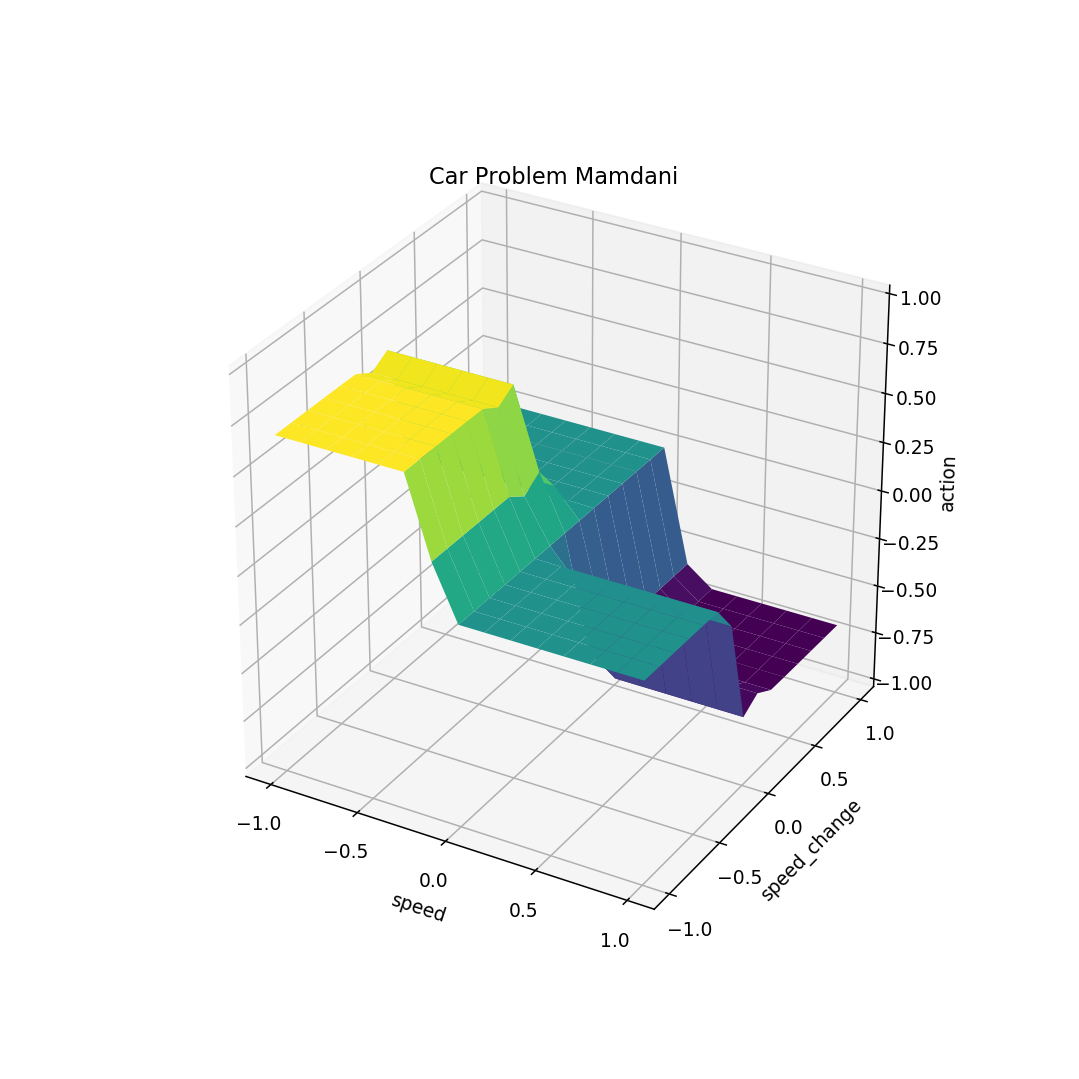

In [3]:
car_speed = LinguisticVariable(name='speed', ling_values_dict={
    'slow': LinPWMF([-0.2, 1], [0, 0]),
    'ok': LinPWMF([-0.2, 0], [0, 1], [0.15, 0]),
    'fast': LinPWMF([0, 0], [0.15, 1], [1, 1], [2, 0])
})

car_acc = LinguisticVariable(name='speed_change', ling_values_dict={
    'slowing': LinPWMF([-0.3, 1], [0, 0]),
    'constant': LinPWMF([-0.3, 0], [0, 1], [0.3, 0]),
    'rising': LinPWMF([0, 0], [0.3, 1])
})

car_action = LinguisticVariable(name='action', ling_values_dict={
    'release': LinPWMF([-1, 1], [0, 0]),
    'nothing': LinPWMF([-1, 0], [0, 1], [1, 0]),
    'push': LinPWMF([0, 0], [1, 1])
})

car_rules = [
    FuzzyRule(ant_act_func=AND_min,
              ants=[Antecedent(car_speed, 'fast'),
                    Antecedent(car_acc, 'constant')],
              cons=[Consequent(car_action, 'release')], impl_func=MIN),

    FuzzyRule(ant_act_func=AND_min,
              ants=[Antecedent(car_speed, 'fast'),
                    Antecedent(car_acc, 'rising')],
              cons=[Consequent(car_action, 'release')], impl_func=MIN),

    FuzzyRule(ant_act_func=AND_min,
              ants=[Antecedent(car_speed, 'slow'),
                    Antecedent(car_acc, 'constant')],
              cons=[Consequent(car_action, 'push')], impl_func=MIN),

    FuzzyRule(ant_act_func=AND_min,
              ants=[Antecedent(car_speed, 'slow'),
                    Antecedent(car_acc, 'slowing')],
              cons=[Consequent(car_action, 'push')], impl_func=MIN),

    FuzzyRule(ant_act_func=AND_min,
              ants=[Antecedent(car_speed, 'fast'),
                    Antecedent(car_acc, 'slowing')],
              cons=[Consequent(car_action, 'nothing')], impl_func=MIN),

    FuzzyRule(ant_act_func=AND_min,
              ants=[Antecedent(car_speed, 'ok'),
                    Antecedent(car_acc, 'slowing')],
              cons=[Consequent(car_action, 'nothing')], impl_func=MIN),

    FuzzyRule(ant_act_func=AND_min,
              ants=[Antecedent(car_speed, 'ok'),
                    Antecedent(car_acc, 'constant')],
              cons=[Consequent(car_action, 'nothing')], impl_func=MIN),

    FuzzyRule(ant_act_func=AND_min,
              ants=[Antecedent(car_speed, 'ok'),
                    Antecedent(car_acc, 'rising')],
              cons=[Consequent(car_action, 'nothing')], impl_func=MIN),

    FuzzyRule(ant_act_func=AND_min,
              ants=[Antecedent(car_speed, 'slow'),
                    Antecedent(car_acc, 'rising')],
              cons=[Consequent(car_action, 'nothing')], impl_func=MIN)
]

fis = FIS(rules=car_rules, aggr_func=np.max,
          defuzz_func=COA_func)

#input_values = {'speed': 1, 'speed_change': 0.22}
#fis.predict(input_values)

#fisv = FISViewer(fis)
#fisv.show()

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='3d'))
show_surface(fis, ax=ax, title="Car Problem Mamdani", x_label="speed", y_label="speed_change", z_label="action",
                 n_pts=15, x_range=(-1, 1), y_range=(-1, 1), z_range=(-1, 1))

## From Mamdani to Singleton FIS

The example above is a Mamdani FIS. We would like to make it a Singleton FIS.

**TODO student** 

* Copy and edit the FIS above to make it a Singleton FIS. Use the provided SingletonFIS class.
* Use `show_surface()` function to display the result and compare with a few words the Mamdani and the Singleton FIS
* Change the surface plot's title accordingly

Optional tip: you can display side-by-side plots with

``` python
fig, axarr = plt.subplots(figsize=(8, 8), nrows=1, ncols=2, subplot_kw=dict(projection='3d'))
show_surface(fis, ax=axarr[0], [...])
show_surface(fis, ax=axarr[1], [...])
```

## Singleton + Default Rule

Using your SingletonFIS from the previous step, you will add a default rule in order to respect the following table. There are 5 distinct area (P, P, N, R and R) so there will be 5 rules (4 fuzzy rules and 1 default fuzzy rule).

<img src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAUoAAAB5CAYAAABfsGiyAAAABHNCSVQICAgIfAhkiAAACJpJREFUeJzt3X2MHHUdx/H37N7eE9dyPWsL9AFKiy1QAQOUh6KhPoCACVBFIZAgyKMYC8YQTSRexCeiQGOsglqCJBCo0BARJDxIqrQSHgpYoVhae3iVWriD6x133O3t7vhHr9jSnj+gd7s3s+/XXzt7c8l37zvzmZnfzvwuiuM4RpI0rBqAKIoqXYckjVk121+0VrAISe9fa2ulK6gemUoXIEljnUEpSQEGpSQFGJSSFGBQSlKAQSlJAQalJAUYlJIUYFBKUkBNeJVkipph5gLIDXcoKEH/f6BrI2zdAiWfeE8Me6tyS29Q1kLLPDj0Qpg+aejNAry5Gjq3QKkB9j4AWmZAvB6evg5W3Q69+UpWrffC3qrcojiO4yiKUvusd/2JcMUj0JSFLYvg1z+D4g4/bzweTrkN5h4IPXfDb86DbneoRKj23vqsd/mkfoxysB36BoASbH1m5x0JoG8V3Hc2dA7AuIVw2kngXErJYG9VLqkPyjgPxdLQ62HGqvJrYM1GIAtTLobaslWnPWFvVS6pD8r3pAjdfdteZsf7R0kVe6sR4HYD0ADThr4U6F0Jg5WtRiPJ3moEGJTAhPPhkCkQd8NTS6FQ6YI0YuytRkJqbw8Kieph/EyY/mU4eRHU5eGFq+DpjZWuTHvK3mqkVU9QZmD2Svju9uUYij3QswnafwHPLYV1a8B7kxPI3mqUVU9QlmDdJ2HZE0PLMRRTdE9dVbO3GmXVE5RAPAjFgUpXodFgbzWa/DJHkgLSH5Q7PIrhvy9PGXurMkl9UEYNkMsCGahvrnQ1Gkn2VuWS7qCMoOVUGF+/bbHlAmiqqlHZFLO3KqPUzh5UMwe+dC/MOAiy2w8HMQxuhlcfhGWXQN+7Z1FQItjbbZw9qHxSewwuvAS3z6l0FRoN9lbllu5Lb0kaAQalJAUYlJIUYFBKUoBBKUkBBqUkBRiUkhRgUEpSgEEpSQEGpSQFGJSSFPDOpBipmxVDkkaIZ5SSFGBQSlKAQSlJAQalJAUYlJIUYFBKUoBBKUkBBqUkBRiUkhRgUEpSQGr/Xa3Sp64JTp4GuR3fLMGTG6C9sPO6E/aDE/fe9UzgtVfgL32jXKhSx6BUYmRycPD+cO4R8NG6oTdjeOZROGEl9O+wbq4BDt0fzjoCDquDQj/c/Sws31SJypV0ToqhxJn6MXjxc9CVh6n1EPfD5TfBr7buuu6Uw+HF02H17+BTa6FU/nKVAo5RKnG6tkB3Ae54AF4uQKYerj0F9ol2s+5r0FWA5zoNSX1wBqUSp1SEfAw9m+Gyv0EemHQQ/HjGrht0qQiDJeg2JbUHDEolVwx//hPc+xaQgbNPg3l1wd+S3jeDUolW7IVvPAwdMdS1wM3HQmOli1LqGJRKvH+/AK3t28Yg5x4HF02odEVKG4NSyVeEW/4Az+chUwfXnAZT3LI1gtyclApvvw4XPwVvAxNnwPWzIFvpopQaBqVS49nH4bYuiDNw5ikwv77SFSktDEqlRqkfrvkjbC5BbTPcNB+adnNvpfR+GZRKldfXwzc3QBGYPQ+++qFKV6Q0MCiVPBFEDLPxluCeB2BlP2Rq4erPwmS3cu0hNyElTrYG6rMwaZgpXfJdcMnj0BND4zgvv7XnDEolSwRHHQYTauDTh0DTMKutexJ+3glxWYtTWhmUSozm6fDXRfDQ0VAHzPkEtC+C5cdsW95RPAjX3QdtxUpUqrRxmjVJCvCMUpICDEpJCjAoJSnAoJSkAINSkgIMSkkKMCglKcCglKQAg1KSAgxKSQoYZv4VpU7r4kpXICWWZ5SSFGBQSlKAQSlJAQalJAUYlJIUYFBKUoBBKUkBBqUkBRiUkhRgUEpSgEEpSQE+661EyTa3c9KCN2j8v4f4iLhQS8emCbS1tbCpM0epXAVWubT2x6BUomRqe5k17++cdeFqTphUJAKIM/S+OpnnX2qms7uWeK+32HfKGxw8u4umTI4NjxzLT3/4GZauGMdgpT9AyqW1P1Ecx3EURdBa6VI0qlI1e1BM84m3svaR59knm2Nt69eZ971pvBXvvM5eM9dx6U/u4EdnbCU3MJGlZ17FZQ/uRbFSZVeN9PXHMUolUERf+wG8PgCU6nj54Q+/ayfctk7vhtnceP5XuHF9jqi+g3NveJxZdRUot+qkrz8GpRKplG8g/x4GtuKefVi2oolBoH6/fzCzaZc9VqMgbf0xKJVyJerGF8kAcb6enkJU6YK0k2T0x6BUqmUnr+PKj/eSJUPHqvms7al0RdpRUvpjUCqlYhpnvch3lt3J5/ct0b/xSBZdMYeOsX4fStVIVn+8PUjJFr3NcYuX8vDW/12yRbkBJu7bxYEzesm3TeX31x/P9689itVbPS8ou5T0x6BUssU5/rlsPovX1gIQjf8X317yEIdPiBloO57Tj/kCj705Nse9qkJK+mNQKuFq2LJqDvevqh9ans2axjaevvklJu7/BLfecChHXnQIHWPx5ryqkI7+jN1zXekDyfLKb8/hyvubKERFpp97J0vO7PaMYMxIZn8MSqVPYW/uuuSL3LM5C7luFi65i3OmjvFTlmqSwP4YlEqmqMT2ka3Mboa4Clvm8rWLjqQ9H1EzaS2Lb32CGbVlrbC6paw/BqUSKdvQQ0MWyBRobi6y676YoePBM7jglhYG4hItC+7j9kWbaRz73xukQtr6Y1AqeaJBZp66hmn1AHlmXbCBybsb5Co18ti3zuOXL+eIM/0c+4MlLL96PVPrxuZjcqmRwv44e1C1SMnsQQ1zHmL5vStYcFAfdZmhHSrO0Lt5Es88sJCFl36Ezp1uWo4Zd9T9rFrxKHMbYyCi0DGTK4++nCVt2Qp8gnRLa38MymqRkqCUKsFLb0kKMCglKcCglKQAg1KSAgxKSQowKCUpwKCUpACDUpICDEpJCjAoJSngnUcY43jsPYguSWPBfwFVXkDrxMTdPwAAAABJRU5ErkJggg==" />

**TODO student**

* Copy and edit your singleton FIS to match the figure above.
  * Add a default fuzzy rule
  * Remove the redundant fuzzy rules
* Use `show_surface()` function to display the result and compare with a few words the Mamdani and this FIS 
* Change the surface plot's title accordingly

## Singleton + Default Rule + NOT conditions

Using the FIS of the previous step (singleton + default rule), you will change the fuzzy rules to add NOT conditions in order to respect the following table. There are 3 distinct area (P, N and R) so there will be 3 rules (2 fuzzy rules and 1 default fuzzy rule).

<img src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAUoAAAB5CAYAAABfsGiyAAAABHNCSVQICAgIfAhkiAAACCZJREFUeJzt3X1sXXUdgPHn3NvbN8roytwGe2FzIxvvGHDAhgq+gAMTYIpCRoIgIIphoIZIItqILxAFFuMUxJFJAoEphIi8CChB2SS8jJcJxbG5zQ7moIO+rKW97b3HP1a021p+2+h67j17Pn/dc3OafLecPD33d885jeI4jpEkDakCIIqipOeQpJJV8d6LxgSHkLTrGhuTnmDvkUl6AEkqdYZSkgIMpSQFGEpJCjCUkhRgKCUpwFBKUoChlKQAQylJARXhXcpTVA/TTobcUL8KitD9H2hdC22boOgd75KGkN5QVkLDLDjsQpg8tv/NPnhnBWzeBMUa2G8KNEyFeDU8ez0svwM680lOLakUpTaUxTfh6avhpT/BZY9BXRY2fQtu/TkUBuxXOxvm3g6zF8MRc+E350G7sZQ0QOrXKHuboasHKELbc9tGEqBrOdx/DmzugX3nwemngM9SkjRQ6kMZ56FQ7H89xDpkfiWsXAtkYcLFUDli00kqB6kP5U4pQHvX1pfZUf6nSNqWTQCogUn9X/h0LoPeZKeRVGIMJTD6fDh0AsTt8Mxi6Et6IEklJbXfeodE1TBqGkz+Mpy6AKry8PKV8OzapCeTVGr2nlBmYMYy+P572zEUOqBjAzT/El5YDKtWgtedS9re3hPKIqz6JCx9qn87hoLXS0raCXtPKIG4Fwo9SU8hqdz4ZY4kBaQ/lANus/HPl0vaHakPZVQDuSyQger6pKeRVI7SHcoIGk6DUdVbNxsugLq9alVW0nBIbTYqZsKX7oOpB0O2/yN33Ty4fD288TAsvQS6tn9ChiQNIrWh7HsV7piZ9BSS0iDdH70laRgYSkkKMJSSFGAoJSnAUEpSgKGUpABDKUkBhlKSAgylJAUYSkkKMJSSFBDFcRxHUQSNSY8iSaXJM0pJCjCUkhRgKCUpwFBKUoChlKQAQylJAYZSkgIMpSQFGEpJCjCUkhSQ2j9Xq/SpqoNTJ0Fu4JtFeHoNNPdtu+/oA+Gk/XY8E3hzPfytaw8PqtQxlCobmRwcchDMPxqOqOp/M4bn/gwnLoPuAfvmauCwg+Dso+HIKujrht8/D/duSGJylTsfiqGyM/Ej8MrnoDUPE6sh7oav3Qy/bttx3wlHwStnwIrfwaeaoDjy4yoFXKNU2WndBO19cOeD8FofZKrh2rkwPhpk3zehtQ9e2GwktfsMpcpOsQD5GDo2wqUvQR4YezBcN3XHA7pYgN4itFtJfQCGUuUrhr/+Be7bAmTgnNNhVlXwp6RdZihV1gqd8M1HoSWGqga45XioTXoopY6hVNl7/WVobN66Bnn4CXDR6KQnUtoYSpW/Atz2R3gxD5kquOZ0mOCRrWHk4aRUePctuPgZeBcYMxVumA7ZpIdSahhKpcbzT8LtrRBn4Ky5MKc66YmUFoZSqVHshmsego1FqKyHm+dA3SDXVkq7ylAqVd5aDd9eAwVgxiz4+v5JT6Q0MJQqPxFEDHHwFuGeB2FZN2Qq4arPwjiPcn1AHkIqO9kKqM7C2CEe6ZJvhUuehI4Yavf147c+OEOp8hLBsUfC6Ar49KFQN8Ruq56GX2yGeESHU1oZSpWN+snw9wXwyEehCpj5cWheAPcet3V7oLgXrr8f1hWSmFRp42PWJCnAM0pJCjCUkhRgKCUpwFBKUoChlKQAQylJAYZSkgIMpSQFGEpJCjCUkhQwxPNXlDqNC5OeQCpbnlFKUoChlKQAQylJAYZSkgIMpSQFGEpJCjCUkhRgKCUpwFBKUoChlKQAQylJAd7rLWnYZOubOeXkt6l931OwiLivkpYNo1m3roENm3MUR2rA3WQoJQ2bTGUn02f9g7MvXMGJYwtEAHGGzjfG8eKr9WxuryTeZwsHTHibQ2a0UpfJseax4/nZjz/D4if2pTfpf8AQojiO4yiKoDHpUbRH+fQgjZiY+pOW0PTYi4zP5mhqvJxZP5jElnjbffaZtoqv/vROfnJmG7meMSw+60oufXgfCkmN/T5co5Q0zCK6mqfwVg9QrOK1Rz+0XSS37tO5ZgY3nf8VblqdI6puYf6NTzK9KoFxd4KhlDTsivka8jux8Bh3jGfpE3X0AtUH/pNpdTsUtSQYSkkJKlI1qkAGiPPVdPRFSQ80KEMpKTHZcau44mOdZMnQsnwOTR1JTzQ4QykpATG101/hu0vv4vMHFOleewwLLptJS4leJ+TlQZL2nOhdTli4mEfb/v+ROsr1MOaAVj48tZP8uon84YbZ/PDaY1nRVrrnbYZS0p4T5/jX0jksbKoEIBr1b65e9AhHjY7pWTebM477Ao+/U5rrkgMZSkl7UAWbls/kgeXV/dszWFm7jmdveZUxBz3FkhsP45iLDqWlFC+eHKB0z3UlpVCW9b89lyseqKMvKjB5/l0sOqu95M/YDKWkkdW3H3df8kXu2ZiFXDvzFt3NuRNL+5TSUEoaflGR91YeM4MsQfZtOpxvXHQMzfmIirFNLFzyFFMrR3TCXWIoJQ27bE0HNVkg00d9fYEdW5mh5eEzueC2BnriIg0n388dCzZSW6Lf6xhKScMr6mXaaSuZVA2QZ/oFaxg32CJksZbHv3Mev3otR5zp5vgfLeLeq1Yzsar0bmM0lJKGTc3MR3ioqZEVP3udugigyPh5S1i9/jqeuHUV+29XnGLbFL43/xO83BUR5bZw6nWLWLthEZdNKa01Sx+ztrfwMWvSbvOMUpICDKUkBRhKSQowlJIUYCglKcBQSlKAoZSkAEMpSQGGUpICDKUkBfzvFsY4Lr0b0SWpFPwXAxXvkmrRh/cAAAAASUVORK5CYII=
" />

**TODO student**

* Copy and edit your singleton + default rule FIS to match the figure above.
* Use `show_surface()` function to display the result and compare with a few words the Mamdani and this FIS 
* Change the surface plot's title accordingly

Exemple of default rule
<br>
`
def_rule = DefaultFuzzyRule(
                    cons=[Consequent(LV, 'MF')], 
                    impl_func=MIN)
`


**TODO student**

* Show using `show_surface()` in a 2x2 grid the 4 variants of the car problem you implemented. See the tip above to know how to plot that.
* Analyze and compare the 4 variants of the car problem with a few words. Specifically, ask yourself about the interpretability aspect, the performance/accuracy. What are the pros and the cons of each FIS compared to the original one (first one/Mamdani).
* According to you, which one is the simplest to build by an algorithm. Justify your answer.

-----------------

# Exercice - please answer below

**TODO student**: 

- Implement what is asked in the right folders
- Write the answer to the questions asked above. _For example_:

>In your opinion, what is the meaning of such a function?

blablabla

>Use `MembershipFunctionViewer` to demonstrate how well your implementation works with some relevant test cases/examples.

_add some plots here..._

## From Mamdani to Singleton FIS

<IPython.core.display.Javascript object>


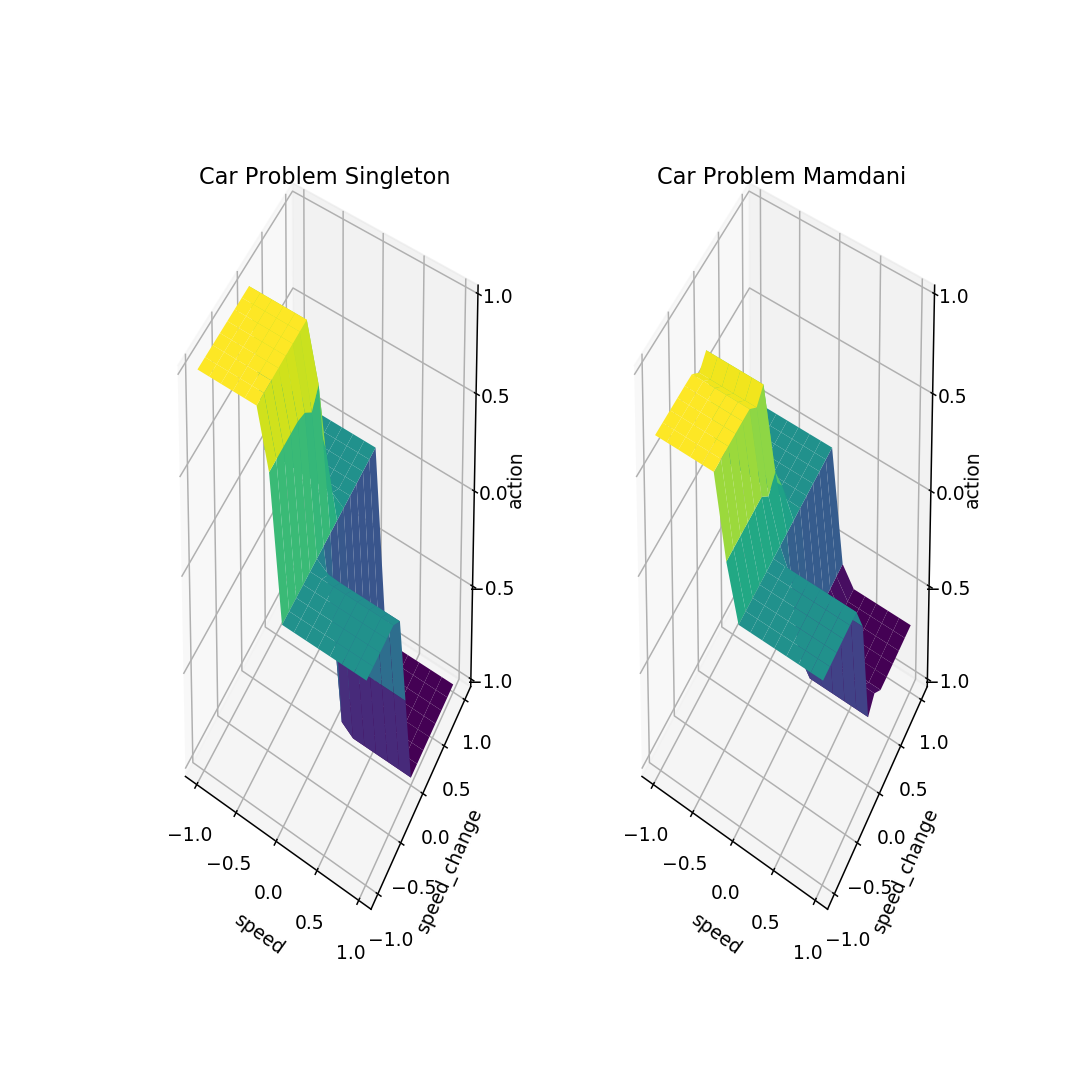

In [4]:
car_speed = LinguisticVariable(name='speed', ling_values_dict={
    'slow': LinPWMF([-0.2, 1], [0, 0]),
    'ok': LinPWMF([-0.2, 0], [0, 1], [0.15, 0]),
    'fast': LinPWMF([0, 0], [0.15, 1], [1, 1], [2, 0])
})

car_acc = LinguisticVariable(name='speed_change', ling_values_dict={
    'slowing': LinPWMF([-0.3, 1], [0, 0]),
    'constant': LinPWMF([-0.3, 0], [0, 1], [0.3, 0]),
    'rising': LinPWMF([0, 0], [0.3, 1])
})

car_action = LinguisticVariable(name='action', ling_values_dict={
    'release': SingletonMF(-1),
    'nothing': SingletonMF(0),
    'push': SingletonMF(1)
})

car_rules = [
    FuzzyRule(ant_act_func=AND_min,
              ants=[Antecedent(car_speed, 'fast'),
                    Antecedent(car_acc, 'constant')],
              cons=[Consequent(car_action, 'release')], impl_func=MIN),

    FuzzyRule(ant_act_func=AND_min,
              ants=[Antecedent(car_speed, 'fast'),
                    Antecedent(car_acc, 'rising')],
              cons=[Consequent(car_action, 'release')], impl_func=MIN),

    FuzzyRule(ant_act_func=AND_min,
              ants=[Antecedent(car_speed, 'slow'),
                    Antecedent(car_acc, 'constant')],
              cons=[Consequent(car_action, 'push')], impl_func=MIN),

    FuzzyRule(ant_act_func=AND_min,
              ants=[Antecedent(car_speed, 'slow'),
                    Antecedent(car_acc, 'slowing')],
              cons=[Consequent(car_action, 'push')], impl_func=MIN),

    FuzzyRule(ant_act_func=AND_min,
              ants=[Antecedent(car_speed, 'fast'),
                    Antecedent(car_acc, 'slowing')],
              cons=[Consequent(car_action, 'nothing')], impl_func=MIN),

    FuzzyRule(ant_act_func=AND_min,
              ants=[Antecedent(car_speed, 'ok'),
                    Antecedent(car_acc, 'slowing')],
              cons=[Consequent(car_action, 'nothing')], impl_func=MIN),

    FuzzyRule(ant_act_func=AND_min,
              ants=[Antecedent(car_speed, 'ok'),
                    Antecedent(car_acc, 'constant')],
              cons=[Consequent(car_action, 'nothing')], impl_func=MIN),

    FuzzyRule(ant_act_func=AND_min,
              ants=[Antecedent(car_speed, 'ok'),
                    Antecedent(car_acc, 'rising')],
              cons=[Consequent(car_action, 'nothing')], impl_func=MIN),

    FuzzyRule(ant_act_func=AND_min,
              ants=[Antecedent(car_speed, 'slow'),
                    Antecedent(car_acc, 'rising')],
              cons=[Consequent(car_action, 'nothing')], impl_func=MIN)
]

singleton_fis = SingletonFIS(rules=car_rules)

fig, axarr = plt.subplots(figsize=(8, 8), nrows=1, ncols=2, subplot_kw=dict(projection='3d'))

show_surface(singleton_fis, ax=axarr[0], title="Car Problem Singleton", x_label="speed", y_label="speed_change", z_label="action",
                 n_pts=15, x_range=(-1, 1), y_range=(-1, 1), z_range=(-1, 1))
show_surface(fis, ax=axarr[1], title="Car Problem Mamdani", x_label="speed", y_label="speed_change", z_label="action",
                 n_pts=15, x_range=(-1, 1), y_range=(-1, 1), z_range=(-1, 1))

The SingletonFIS is more precise and has less humanity, it's like a robot who wants to drive abruptly

> ## Singleton + default rule
**TODO student**
* Copy and edit your singleton FIS to match the figure above.
  * Add a default fuzzy rule
  * Remove the redundant fuzzy rules
* Use `show_surface()` function to display the result and compare with a few words the Mamdani and this FIS 
* Change the surface plot's title accordingly

<IPython.core.display.Javascript object>


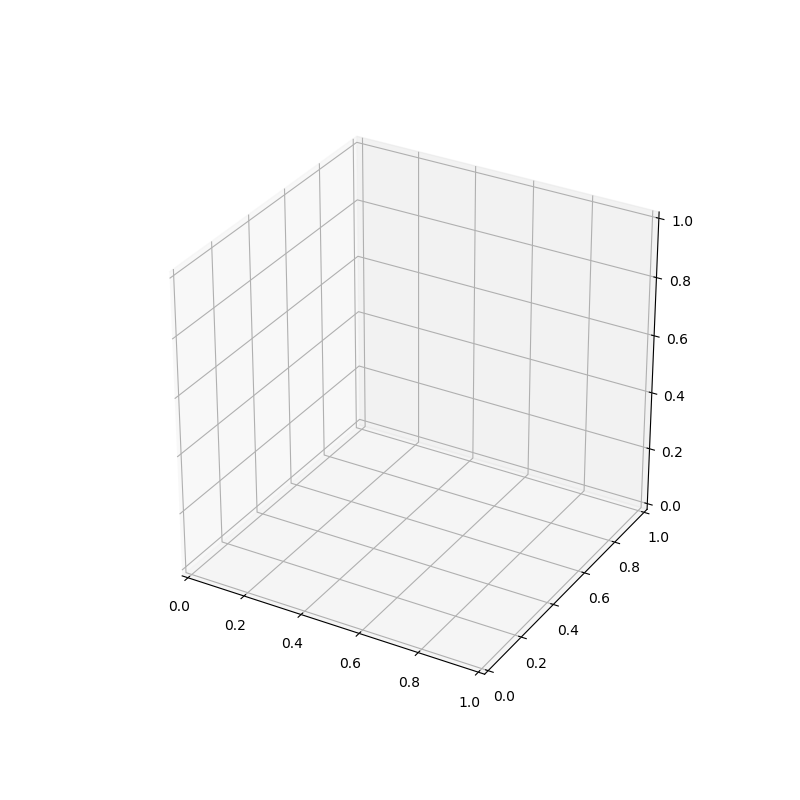

In [7]:
car_speed = LinguisticVariable(name='speed', ling_values_dict={
    'slow': LinPWMF([-0.2, 1], [0, 0]),
    'ok': LinPWMF([-0.2, 0], [0, 1], [0.15, 0]),
    'fast': LinPWMF([0, 0], [0.15, 1], [1, 1], [2, 0])
})

car_acc = LinguisticVariable(name='speed_change', ling_values_dict={
    'slowing': LinPWMF([-0.3, 1], [0, 0]),
    'constant': LinPWMF([-0.3, 0], [0, 1], [0.3, 0]),
    'rising': LinPWMF([0, 0], [0.3, 1])
})

car_action = LinguisticVariable(name='action', ling_values_dict={
    'release': SingletonMF(-1),
    'nothing': SingletonMF(0),
    'push': SingletonMF(1)
})

car_rules = [
    FuzzyRule(ant_act_func=AND_min,
              ants=[Antecedent(car_speed, 'fast'),
                    Antecedent(car_acc, 'constant')],
              cons=[Consequent(car_action, 'release')], impl_func=MIN),

    FuzzyRule(ant_act_func=AND_min,
              ants=[Antecedent(car_speed, 'fast'),
                    Antecedent(car_acc, 'rising')],
              cons=[Consequent(car_action, 'release')], impl_func=MIN),

    FuzzyRule(ant_act_func=AND_min,
              ants=[Antecedent(car_speed, 'slow'),
                    Antecedent(car_acc, 'constant')],
              cons=[Consequent(car_action, 'push')], impl_func=MIN),

    FuzzyRule(ant_act_func=AND_min,
              ants=[Antecedent(car_speed, 'slow'),
                    Antecedent(car_acc, 'slowing')],
              cons=[Consequent(car_action, 'push')], impl_func=MIN),

]

default_rule =  DefaultFuzzyRule(cons=[Consequent(car_action, 'nothing')], impl_func=MIN)

singleton_default_fis = SingletonFIS(rules=car_rules, default_rule=default_rule)

fig, axarr = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='3d'))

show_surface(singleton_default_fis, ax=ax, title="Car Problem Singleton with default rule", x_label="speed", y_label="speed_change", z_label="action",
                 n_pts=15, x_range=(-1, 1), y_range=(-1, 1), z_range=(-1, 1))

### To submit

* Please make a zip called `lfa_labXX_YY.zip` where `XX` is the lab number and `YY` is your familly name. For example: `lfa_lab02_smith.zip`. 
* The mail's subject is `[LFA] rendu labXX` where `XX` is the lab number

The zip must contain all _needed_ the files to run this notebook. That is, don't send your virtualenv (only the requirements.txt). **If any additional steps are required to run your notebook(s)/code, please add a README.md where you indicate all the needed steps to reproduce your work.**

Note: Your notebooks must run completely even after the Jupyter kernel has been restarted. To ensure it will be the case when your lab will be reviewed, please select in the top menu "Kernel -> Restart and Run all" and check that the output of each cell is the desired output you want to submit.